## __Install & mount a Drive__

In [1]:
!pip install -q datasets transformers librosa jiwer accelerate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## __1.Load datasets__

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

ko = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 100))
en = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 100))
ja = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 100))
de = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 100))

dataset = Dataset.from_list(ko + en + ja + de)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 720.10it/s]
Reading metadata...: 1013968it [00:21, 46685.53it/s]
Reading metadata...: 7071it [00:00, 20045.12it/s]
Reading metadata...: 540437it [00:11, 46254.42it/s]


## __2.Whisper-medium__

In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-medium"

processor = WhisperProcessor.from_pretrained(checkpoint, language=None, task="transcribe")
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

## __3.Preprocessing__

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
#DataCollator 정의
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_multi_medium_trial1",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=5,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-15cdf21cd160>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## __4.Training__

In [7]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
5,8.594100
10,7.180300
15,5.411600
20,4.521300
25,3.304600
30,2.982600
35,2.488600
40,2.247800
45,1.333000
50,1.616600


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=300, training_loss=0.969742438942194, metrics={'train_runtime': 493.3294, 'train_samples_per_second': 2.432, 'train_steps_per_second': 0.608, 'total_flos': 1.224725889024e+18, 'train_loss': 0.969742438942194, 'epoch': 3.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_multi_medium_trial1"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

## __5.Prediction__

In [9]:
import torch
from jiwer import wer
from tqdm import tqdm

def filter_by_lang(dataset, lang_code):
    return [x for x in dataset if x["locale"] == lang_code]

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"\n🌍 Language: {lang}")
    lang_data = filter_by_lang(dataset, lang)

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"\n🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"\n✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:01<03:08,  1.90s/it]


🔹 Predicted: 어느덧 그 더운 팔월도 하루를 남기고 다 지나 버렸다.
🔸 Reference: 어느덧 그 더운 팔월도 하루를 남기고 다 지나 버렸다.


  2%|▏         | 2/100 [00:02<02:17,  1.40s/it]


🔹 Predicted: 근자에 춘우의 동료 사이에는 이상한 소문이 돌아다니었다.
🔸 Reference: 근자에 춘우의 동료 사이에는 이상한 소문이 돌아다니었다.


  3%|▎         | 3/100 [00:03<01:54,  1.18s/it]


🔹 Predicted: 재차 부르는 소리를 듣고야 선비는 발길을 떼었다.
🔸 Reference: 재차 부르는 소리를 듣고야 선비는 발길을 떼었다.


  4%|▍         | 4/100 [00:04<01:39,  1.03s/it]


🔹 Predicted: 그애의 말값으로 찾아나 봤으면 되는 것 아니냐.
🔸 Reference: 그애의 말값으로 찾아나 봤으면 되는 것 아니냐.


  5%|▌         | 5/100 [00:05<01:37,  1.03s/it]


🔹 Predicted: 그가 방으로 들어오니 간난이가 와서 그의 하던 일을 하고 있었다.
🔸 Reference: 그가 방으로 들어오니 간난이가 와서 그의 하던 일을 하고 있었다.


  6%|▌         | 6/100 [00:06<01:23,  1.13it/s]


🔹 Predicted: 안녕히 다녀옵시요.
🔸 Reference: 안녕히 다녀옵시요.


  7%|▋         | 7/100 [00:07<01:30,  1.02it/s]


🔹 Predicted: 어떻게 무엇부터 시작을 해야 할는지 엄두가 나지를 않아서 잠을 잘 수가 없었다.
🔸 Reference: 어떻게 무엇부터 시작을 해야 할는지 엄두가 나지를 않아서 잠을 잘 수가 없었다.


  8%|▊         | 8/100 [00:08<01:20,  1.15it/s]


🔹 Predicted: 죽는 날까지 하늘을 우러러
🔸 Reference: 죽는 날까지 하늘을 우러러


  9%|▉         | 9/100 [00:08<01:16,  1.19it/s]


🔹 Predicted: 그리고 그 어두운 방 안이 휙 지나친다.
🔸 Reference: 그리고 그 어두운 방 안이 휙 지나친다.


 10%|█         | 10/100 [00:09<01:09,  1.29it/s]


🔹 Predicted: 왜 눈을 바루 뜨지 못해?
🔸 Reference: 왜 눈을 바루 뜨지 못해!


 11%|█         | 11/100 [00:10<01:19,  1.12it/s]


🔹 Predicted: 영신은 바라던 대로 바닷가 한가한 집에서 편안히 쉴 수가 있었다.
🔸 Reference: 영신은 바라던 대로 바닷가 한가한 집에서 편안히 쉴 수가 있었다.


 12%|█▏        | 12/100 [00:11<01:13,  1.20it/s]


🔹 Predicted: 잡을 수 없는 저 하늘의 별도 잡자.
🔸 Reference: 잡을 수 없는 저 하늘의 별도 잡자.


 13%|█▎        | 13/100 [00:12<01:11,  1.21it/s]


🔹 Predicted: 하고 몽몽이 소리가 뒤를 따랐다.
🔸 Reference: 하고, 목메인 소리가 뒤를 따랐다.


 14%|█▍        | 14/100 [00:13<01:13,  1.16it/s]


🔹 Predicted: 그리고 그의 하던 말을 곰곰이 되풀이하였다.
🔸 Reference: 그리고 그의 하던 말을 곰곰이 되풀이하였다.


 15%|█▌        | 15/100 [00:13<01:05,  1.31it/s]


🔹 Predicted: 영원한 것이 어디 있는가?
🔸 Reference: 영원한 것이 어디 있는가?


 16%|█▌        | 16/100 [00:14<01:14,  1.13it/s]


🔹 Predicted: 그것은 예수가 십자가에 못박히며 최후로 부르짖은 말이었다.
🔸 Reference: 그것은 예수가 십자가에 못박히며 최후로 부르짖은 말이었다.


 17%|█▋        | 17/100 [00:15<01:15,  1.10it/s]


🔹 Predicted: 그 틈에 그 짐짝은 딴놈이 메고 달아난다.
🔸 Reference: 그 틈에 그 짐짝은 딴놈이 메고 달아난다.


 18%|█▊        | 18/100 [00:16<01:16,  1.07it/s]


🔹 Predicted: 그는 이러한 생각을 되풀이하는 새 벌써 간난네 집까지 왔다.
🔸 Reference: 그는 이러한 생각을 되풀이하는 새 벌써 간난네 집까지 왔다.


 19%|█▉        | 19/100 [00:17<01:19,  1.02it/s]


🔹 Predicted: 양식 떨어진 사람이 보릿고개를 넘기는것만치 나 까마아득한 것 같습니다.
🔸 Reference: 양식 떨어진 사람이 보릿고개를 넘기는것만치 나 까마아득한 것 같습니다.


 20%|██        | 20/100 [00:18<01:14,  1.07it/s]


🔹 Predicted: 그래서 그는 억지로 웃어 보이고 말았다.
🔸 Reference: 그래서 그는 억지로 웃어 보이고 말았다.


 21%|██        | 21/100 [00:19<01:16,  1.04it/s]


🔹 Predicted: 연해 꾸짖으며 질팡갈팡 뛰는 수밖에 없었다.
🔸 Reference: 연해 꾸짖으며 질팡갈팡 뛰는 수밖에 없었다.


 22%|██▏       | 22/100 [00:20<01:12,  1.08it/s]


🔹 Predicted: 영신을 눕히고 자세히 진찰을 해본다.
🔸 Reference: 영신을 눕히고 자세히 진찰을 해본다.


 23%|██▎       | 23/100 [00:21<01:02,  1.23it/s]


🔹 Predicted: 야시이 테그 마르고?
🔸 Reference: 몇 시 퇴근하려고?


 24%|██▍       | 24/100 [00:22<01:11,  1.07it/s]


🔹 Predicted: 국회는 의원의 자격을 심사하며 의원을 징계할 수 있다.
🔸 Reference: 국회는 의원의 자격을 심사하며, 의원을 징계할 수 있다.


 25%|██▌       | 25/100 [00:23<01:15,  1.01s/it]


🔹 Predicted: 아담이 모든 육축과 공중의 새와 들의 모든 짐승에게 이름을 주니라
🔸 Reference: 아담이 모든 육축과 공중의 새와 들의 모든 짐승에게 이름을 주니라


 26%|██▌       | 26/100 [00:24<01:17,  1.04s/it]


🔹 Predicted: 그 뒤로 게 딱지 같은 집들이 오글오글 쫓겨서 몰려들어 간다.
🔸 Reference: 그 뒤로 게 딱지 같은 집들이 오글오글 쫓겨서 몰려들어 간다.


 27%|██▋       | 27/100 [00:25<01:21,  1.11s/it]


🔹 Predicted: 그리고 그의 옷이 땀에 배어 어룽어룽하니 말라진 것을 보았다.
🔸 Reference: 그리고 그의 옷이 땀에 배어 어룽어룽하니 말라진 것을 보았다.


 28%|██▊       | 28/100 [00:26<01:14,  1.03s/it]


🔹 Predicted: 춘우는 자기 아버지가 약주에 취하신 것을 알았다.
🔸 Reference: 춘우는 자기 아버지가 약주 취하신 것을 알았다.


 29%|██▉       | 29/100 [00:27<01:12,  1.02s/it]


🔹 Predicted: 찌르릉 하고 창자에 퍼지며 얼굴이 화끈하였다.
🔸 Reference: 찌르릉 하고 창자에 퍼지며 얼굴이 화끈하였다.


 30%|███       | 30/100 [00:28<01:13,  1.05s/it]


🔹 Predicted: 바람은 파도 소리처럼 쏴아쏴아 하고 머리 맡에서 뒤설렌다.
🔸 Reference: 바람은 파도 소리처럼 쏴아쏴아 하고 머리 맡에서 뒤설렌다.


 31%|███       | 31/100 [00:29<01:07,  1.02it/s]


🔹 Predicted: 춘우에게 이 모든 사정의 말을 하여 버릴까.
🔸 Reference: 춘우에게 이 모든 사정의 말을 하여 버릴까.


 32%|███▏      | 32/100 [00:30<01:06,  1.03it/s]


🔹 Predicted: 기가는 사람이 걱정을 하리만큼 그의 걸음은 황급하였다.
🔸 Reference: 길 가는 사람이 걱정을 하리만큼 그의 걸음은 황급하였다.


 33%|███▎      | 33/100 [00:32<01:13,  1.10s/it]


🔹 Predicted: 선비는 간난이가 저렇게 늦게 돌아올 때마다 무엇을 깊이 생각하는 것이 수상스러웠다.
🔸 Reference: 선비는 간난이가 저렇게 늦게 돌아올 때마다 무엇을 깊이 생각하는 것이 수상스러웠다.


 34%|███▍      | 34/100 [00:32<01:05,  1.01it/s]


🔹 Predicted: 부엌은 아름답게 장식되었습니다.
🔸 Reference: 부엌은 아름답게 장식되었습니다.


 35%|███▌      | 35/100 [00:33<01:04,  1.01it/s]


🔹 Predicted: 신철이는 할멈이 깨었으므로 그만 낙망을 하였다.
🔸 Reference: 신철이는 할멈이 깨었으므로 그만 낙망을 하였다.


 36%|███▌      | 36/100 [00:34<01:02,  1.02it/s]


🔹 Predicted: 납작한 얼굴을 쳐들고 첫째의 눈치를 살살 본다.
🔸 Reference: 납작한 얼굴을 쳐들고 첫째의 눈치를 살살 본다.


 37%|███▋      | 37/100 [00:35<01:06,  1.06s/it]


🔹 Predicted: 아담과 그 아내가 여호와 하나님의 낯을 피하여 동산 나무 사이에 숨은지라
🔸 Reference: 아담과 그 아내가 여호와 하나님의 낯을 피하여 동산 나무 사이에 숨은지라


 38%|███▊      | 38/100 [00:36<00:56,  1.09it/s]


🔹 Predicted: 나는 두 번째 그에게 물었습니다.
🔸 Reference: 나는 두 번째 그에게 물었습니다.


 39%|███▉      | 39/100 [00:37<00:51,  1.19it/s]


🔹 Predicted: 무소식이 희소식이다
🔸 Reference: 무소식이 희소식이다


 40%|████      | 40/100 [00:38<00:50,  1.19it/s]


🔹 Predicted: 그는 대답 대신에 늘 이렇게 웃는 것이 버릇이다.
🔸 Reference: 그는 대답 대신에 늘 이렇게 웃는 것이 버릇이다.


 41%|████      | 41/100 [00:39<00:54,  1.07it/s]


🔹 Predicted: 대저 너희가 지식을 미워하며 여호와 경외하기를 즐거워하지 아니하며
🔸 Reference: 대저 너희가 지식을 미워하며 여호와 경외하기를 즐거워하지 아니하며


 42%|████▏     | 42/100 [00:39<00:45,  1.26it/s]


🔹 Predicted: 경기 시작됐습니다.
🔸 Reference: 경기 시작됐습니다.


 43%|████▎     | 43/100 [00:41<00:55,  1.02it/s]


🔹 Predicted: 선비는 육백삼호인 가마 곁으로 와서 동무의 어깨를 가볍게 쳤다.
🔸 Reference: 선비는 육백삼호인 가마 곁으로 와서 동무의 어깨를 가볍게 쳤다.


 44%|████▍     | 44/100 [00:42<00:55,  1.00it/s]


🔹 Predicted: 그래서 간난 어머니는 눈을 둥그렇게 뜨고 눈치를 살폈다.
🔸 Reference: 그래서 간난 어머니는 눈을 둥그렇게 뜨고 눈치를 살폈다.


 45%|████▌     | 45/100 [00:43<00:56,  1.03s/it]


🔹 Predicted: 그러자 엉엉 하고 우는 개똥이의 곡성을 들은 듯싶다.
🔸 Reference: 그러자 엉엉 하고 우는 개똥이의 곡성을 들은 듯싶다.


 46%|████▌     | 46/100 [00:44<00:57,  1.07s/it]


🔹 Predicted: 그러나 무엇이라고 꼭 집어대어 철수와 같이 술술 지껄일수는 없었다.
🔸 Reference: 그러나 무엇이라고 꼭 집어대어 철수와 같이 술술 지껄일수는 없었다.


 47%|████▋     | 47/100 [00:45<01:00,  1.14s/it]


🔹 Predicted: 고난의 시기에 동요하지 않는 것은 진정 칭찬받을 만한 뛰어난 인물의 증거다.
🔸 Reference: 고난의 시기에 동요하지 않는 것은 진정 칭찬받을 만한 뛰어난 인물의 증거다.


 48%|████▊     | 48/100 [00:46<00:57,  1.10s/it]


🔹 Predicted: 영신은 다시 부르짖듯이 신앙의 대상자에게 호소한다.
🔸 Reference: 영신은 다시 부르짖듯이 신앙의 대상자에게 호소한다.


 49%|████▉     | 49/100 [00:47<00:58,  1.14s/it]


🔹 Predicted: 그리고 선비의 그 고운 얼굴이 미소를 띠고 지나치는 것을 그는 확실히 보았다.
🔸 Reference: 그리고 선비의 그 고운 얼굴이 미소를 띠고 지나치는 것을 그는 확실히 보았다.


 50%|█████     | 50/100 [00:48<00:54,  1.10s/it]


🔹 Predicted: 나의 교훈을 받지 아니하고 나의 모든 책망을 업신여겼음이라
🔸 Reference: 나의 교훈을 받지 아니하고 나의 모든 책망을 업신여겼음이라


 51%|█████     | 51/100 [00:49<00:44,  1.10it/s]


🔹 Predicted: 개천에서 용 난다
🔸 Reference: 개천에서 용 난다


 52%|█████▏    | 52/100 [00:50<00:48,  1.02s/it]


🔹 Predicted: 나는 그 알레그로가 울리어 나오는 순간 마음은 끝까지 긴장되고 흥분되었습니다.
🔸 Reference: 나는 그 알레그로가 울리어 나오는 순간 마음은 끝까지 긴장되고 흥분되었습니다.


 53%|█████▎    | 53/100 [00:51<00:47,  1.01s/it]


🔹 Predicted: 선비가 이 공장에 들어온 지가 벌써 거의 일년이 되어 온다.
🔸 Reference: 선비가 이 공장에 들어온 지가 벌써 거의 일년이 되어 온다.


 54%|█████▍    | 54/100 [00:52<00:47,  1.03s/it]


🔹 Predicted: 벌써부터 이런 생각을 가졌으나 용이하게 기회를 타는 수가 없었다.
🔸 Reference: 벌써부터 이런 생각을 가졌으나 용이하게 기회를 타는 수가 없었다.


 55%|█████▌    | 55/100 [00:53<00:47,  1.07s/it]


🔹 Predicted: 그는 종잇조각과 연필을 내어 신철에게 무엇을 써서 보였다.
🔸 Reference: 그는 종잇조각과 연필을 내어 신철에게 무엇을 써서 보였다.


 56%|█████▌    | 56/100 [00:55<00:48,  1.10s/it]


🔹 Predicted: 헌법재판소 재판관은 정당에 가입하거나 정치에 관여할 수 없다.
🔸 Reference: 헌법재판소 재판관은 정당에 가입하거나 정치에 관여할 수 없다.


 57%|█████▋    | 57/100 [00:56<00:46,  1.07s/it]


🔹 Predicted: 이번엔 제법 목소리가 패인 남학생의 질문이 들어왔다.
🔸 Reference: 이번엔 제법 목소리가 패인 남학생의 질문이 들어왔다.


 58%|█████▊    | 58/100 [00:57<00:43,  1.05s/it]


🔹 Predicted: 한번의 실파와 영원한 실패를 혼동하지 마라.
🔸 Reference: 한번의 실패와 영원한 실패를 혼동하지 마라.


 59%|█████▉    | 59/100 [00:58<00:42,  1.03s/it]


🔹 Predicted: 방망이 소리는 그가 걸을수록 점점 희미하게 들렸다.
🔸 Reference: 방망이 소리는 그가 걸을수록 점점 희미하게 들렸다.


 60%|██████    | 60/100 [00:58<00:39,  1.01it/s]


🔹 Predicted: 모든 국민은 학문과 예술의 자유를 가진다.
🔸 Reference: 모든 국민은 학문과 예술의 자유를 가진다.


 61%|██████    | 61/100 [01:00<00:43,  1.12s/it]


🔹 Predicted: 학생 또는 보호자는 학생 본인에 관한 학교 기록을 언제든지 열람할 권리를 가진다.
🔸 Reference: 학생 또는 보호자는 학생 본인에 관한 학교 기록을 언제든지 열람할 권리를 가진다.


 62%|██████▏   | 62/100 [01:01<00:37,  1.01it/s]


🔹 Predicted: 그는 담 밑에 착 붙어 섰다.
🔸 Reference: 그는 담 밑에 착 붙어 섰다.


 63%|██████▎   | 63/100 [01:01<00:33,  1.10it/s]


🔹 Predicted: 사랑은 말이지, 소유하는 게 아니야.
🔸 Reference: 사랑은 말이지, 소유하는 게 아니야.


 64%|██████▍   | 64/100 [01:02<00:33,  1.08it/s]


🔹 Predicted: 효애는 여전히 뭐라고 소곤소곤 이야기를 하였다.
🔸 Reference: 효애는 여전히 뭐라고 소곤소곤 이야기를 하였다.


 65%|██████▌   | 65/100 [01:03<00:31,  1.12it/s]


🔹 Predicted: 점심 뒤에 회원들은 잡담을 하며 잠시 쉬었다.
🔸 Reference: 점심 뒤에 회원들은 잡담을 하며 잠시 쉬었다.


 66%|██████▌   | 66/100 [01:04<00:34,  1.01s/it]


🔹 Predicted: 영신은 그제야 그전에 백씨의 집에서 들은 동혁의 말을 되풀이하듯 하였다.
🔸 Reference: 영신은 그제야 그전에 백씨의 집에서 들은 동혁의 말을 되풀이하듯 하였다.


 67%|██████▋   | 67/100 [01:05<00:31,  1.06it/s]


🔹 Predicted: 세상에 나의 마음을 알아 주는 사람이 어디 있어야죠.
🔸 Reference: 세상에 나의 마음을 알아 주는 사람이 어디 있어야죠.


 68%|██████▊   | 68/100 [01:06<00:28,  1.12it/s]


🔹 Predicted: 부르짖으며 저 혼자 감격하는 것이었다.
🔸 Reference: 부르짖으며 저 혼자 감격하는 것이었다.


 69%|██████▉   | 69/100 [01:07<00:32,  1.06s/it]


🔹 Predicted: 두 아들은 방 속에다 죽은 그 아버지의 송장을 제쳐놓고 서로 잡아삼킬 듯이 다투고 있었습니다.
🔸 Reference: 두 아들은 방 속에다 죽은 그 아버지의 송장을 제쳐놓고 서로 잡아삼킬 듯이 다투고 있었습니다.


 70%|███████   | 70/100 [01:08<00:31,  1.06s/it]


🔹 Predicted: 여자가 뱀에게 말하되 동산 나무의 실과를 우리가 먹을 수 있으나
🔸 Reference: 여자가 뱀에게 말하되 동산 나무의 실과를 우리가 먹을 수 있으나


 71%|███████   | 71/100 [01:09<00:27,  1.04it/s]


🔹 Predicted: 국가는 국가표준제도를 확립한다.
🔸 Reference: 국가는 국가표준제도를 확립한다.


 72%|███████▏  | 72/100 [01:10<00:27,  1.03it/s]


🔹 Predicted: 다른 누구에게도 의지하지 말고 오직 그대 혼자의 힘으로 하라.
🔸 Reference: 다른 누구에게도 의지하지 말고 오직 그대 혼자의 힘으로 하라.


 73%|███████▎  | 73/100 [01:11<00:26,  1.04it/s]


🔹 Predicted: 까불이는 의자를 버쩍 들어 옮겨 놔주었다.
🔸 Reference: 까불이는 의자를 버쩍 들어 옮겨 놔주었다.


 74%|███████▍  | 74/100 [01:12<00:23,  1.11it/s]


🔹 Predicted: 그가 좋아할 때마다 이런 버릇이 있었다.
🔸 Reference: 그가 좋아할 때마다 이런 버릇이 있었다.


 75%|███████▌  | 75/100 [01:13<00:22,  1.11it/s]


🔹 Predicted: 탄핵결정은 공직으로부터 파면함에 그친다.
🔸 Reference: 탄핵결정은 공직으로부터 파면함에 그친다.


 76%|███████▌  | 76/100 [01:14<00:23,  1.02it/s]


🔹 Predicted: 한편으로 그가 영신을 될 수 있는 대로 호의로써 이해하려는 것도 물론이다.
🔸 Reference: 한편으로 그가 영신을 될 수 있는 대로 호의로써 이해하려는 것도 물론이다.


 77%|███████▋  | 77/100 [01:15<00:24,  1.05s/it]


🔹 Predicted: 선비는 얼굴이 뻘개서 가마에서 뽑혀 나오는 실 끝을 들여다보았다.
🔸 Reference: 선비는 얼굴이 뻘개서 가마에서 뽑혀 나오는 실끝을 들여다보았다.


 78%|███████▊  | 78/100 [01:16<00:23,  1.06s/it]


🔹 Predicted: 무척 배가 고팠음에도 당분간은 아무것도 먹지 않기로 했다.
🔸 Reference: 무척 배가 고팠음에도 당분간은 아무것도 먹지 않기로 했다.


 79%|███████▉  | 79/100 [01:17<00:22,  1.06s/it]


🔹 Predicted: 신철이는 영철의 우는 소리를 들으며 문밖을 나섰다.
🔸 Reference: 신철이는 영철의 우는 소리를 들으며 문밖을 나섰다.


 80%|████████  | 80/100 [01:18<00:21,  1.09s/it]


🔹 Predicted: 혹은 사오십 년 뒤에 조선을 무대로 생겨날 이야기라고 생각하여도 좋다.
🔸 Reference: 혹은 사오십 년 뒤에 조선을 무대로 생겨날 이야기라고 생각하여도 좋다.


 81%|████████  | 81/100 [01:19<00:17,  1.11it/s]


🔹 Predicted: 어디서 오셨어요?
🔸 Reference: 어디서 오셨어요?


 82%|████████▏ | 82/100 [01:20<00:16,  1.06it/s]


🔹 Predicted: 덕호는 문 안에 선 채 선비 어머니를 바라보며 걱정을 한다.
🔸 Reference: 덕호는 문 안에 선 채 선비 어머니를 바라보며 걱정을 한다.


 83%|████████▎ | 83/100 [01:21<00:17,  1.02s/it]


🔹 Predicted: 그리고 무어라고 손질을 두어 번 치고 모밀 밭뒤로 사라진다.
🔸 Reference: 그리고 무어라고 손질을 두어 번 치고 모밀 밭뒤로 사라진다.


 84%|████████▍ | 84/100 [01:22<00:17,  1.08s/it]


🔹 Predicted: 선비는 씨아틀도 만지지 않으면 앞이 허전한 것 같아서 그냥 붙들고 있었다.
🔸 Reference: 선비는 씨아틀도 만지지 않으면 앞이 허전한 것 같아서 그냥 붙들고 있었다.


 85%|████████▌ | 85/100 [01:24<00:16,  1.10s/it]


🔹 Predicted: 동시에 잠깐 잊었던 아픔이 그의 전신을 못 견디게 습격하였다.
🔸 Reference: 동시에 잠깐 잊었던 아픔이 그의 전신을 못 견디게 습격하였다.


 86%|████████▌ | 86/100 [01:25<00:17,  1.22s/it]


🔹 Predicted: 첫째는 무정처하고 걷다가 다시 덕호의 집 주위를 한 바퀴 돌아서 그의 집으로 왔다.
🔸 Reference: 첫째는 무정처하고 걷다가 다시 덕호의 집 주위를 한 바퀴 돌아서 그의 집으로 왔다.


 87%|████████▋ | 87/100 [01:26<00:14,  1.12s/it]


🔹 Predicted: 사회 교화자로서의 의견을 말씀해주십쇼."
🔸 Reference: 사회 교화자로서의 의견을 말씀해주십쇼."


 88%|████████▊ | 88/100 [01:27<00:12,  1.04s/it]


🔹 Predicted: 그는 마침내 구역질을 욱 하고 하였다.
🔸 Reference: 그는 마침내 구역질을 욱 하고 하였다.


 89%|████████▉ | 89/100 [01:28<00:11,  1.06s/it]


🔹 Predicted: 장로와 다른 교인들이 들어와 병원으로 가기를 번차례로 권하였다.
🔸 Reference: 장로와 다른 교인들이 들어와 병원으로 가기를 번차례로 권하였다.


 90%|█████████ | 90/100 [01:29<00:10,  1.07s/it]


🔹 Predicted: 그래서 그는 잘못 찾아왔는가 하여 도로 나와서 주저하다가 다시 들어갔다.
🔸 Reference: 그래서 그는 잘못 찾아왔는가 하여 도로 나와서 주저하다가 다시 들어갔다.


 91%|█████████ | 91/100 [01:29<00:08,  1.12it/s]


🔹 Predicted: 나는 아무 걱정도 없이
🔸 Reference: 나는 아무 걱정도 없이


 92%|█████████▏| 92/100 [01:30<00:06,  1.15it/s]


🔹 Predicted: 평안도 어느 산 깊은 금덤판.
🔸 Reference: 평안도 어느 산 깊은 금덤판.


 93%|█████████▎| 93/100 [01:32<00:07,  1.05s/it]


🔹 Predicted: 비록 고구라 양복일 망정 노박이로 비를 맞으며 김첨지를 뒤쫓아 나왔으랴.
🔸 Reference: 비록 고구라 양복일 망정 노박이로 비를 맞으며 김첨지를 뒤쫓아 나왔으랴.


 94%|█████████▍| 94/100 [01:33<00:06,  1.03s/it]


🔹 Predicted: 팔을 놀리면 팔이 아프고 다리를 놀리면 다리가 아팠다.
🔸 Reference: 팔을 놀리면 팔이 아프고 다리를 놀리면 다리가 아팠다.


 95%|█████████▌| 95/100 [01:34<00:05,  1.05s/it]


🔹 Predicted: 그가 방문을 소리 없이 열고 나서니 옆집에서는 시계가 새로 두시를 친다.
🔸 Reference: 그가 방문을 소리 없이 열고 나서니 옆집에서는 시계가 새로 두시를 친다.


 96%|█████████▌| 96/100 [01:35<00:03,  1.01it/s]


🔹 Predicted: 영숙은 다시 춘우의 마음을 헤아려 보았다.
🔸 Reference: 영숙은 다시 춘우의 마음을 헤아려 보았다.


 97%|█████████▋| 97/100 [01:36<00:03,  1.08s/it]


🔹 Predicted: 본래부터 뼈만 남았던 그가 한층 더하여 마치 해골을 대하는 듯하였다.
🔸 Reference: 본래부터 뼈만 남았던 그가 한층 더하여 마치 해골을 대하는 듯하였다.


 98%|█████████▊| 98/100 [01:37<00:01,  1.04it/s]


🔹 Predicted: 그래봐야 아무것도 얻을 것이 없다.
🔸 Reference: 그래봐야 아무것도 얻을 것이 없다.


 99%|█████████▉| 99/100 [01:38<00:01,  1.07s/it]


🔹 Predicted: 고즈넉히 일어서서 피아노 앞에 가서 그의 어깨에 가만히 손을 얈졌습니다.
🔸 Reference: 고즈넉히 일어서서 피아노 앞에 가서 그의 어깨에 가만히 손을 얹었습니다.


100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


🔹 Predicted: 난장보살은 호미로 땅을 치며 이렇게 소리쳤다.
🔸 Reference: 난장보살은 호미로 땅을 치며 이렇게 소리쳤다.

✅ KO WER: 0.0187

🌍 Language: en



  1%|          | 1/100 [00:01<02:14,  1.35s/it]


🔹 Predicted: Takšen je vsez kaffel vodne vodne vodne vodne.
🔸 Reference: This device has a cathode inside an anode wire cage.


  2%|▏         | 2/100 [00:02<01:56,  1.18s/it]


🔹 Predicted: Takšen produkt je pravzak način produsen za industrializaciju.
🔸 Reference: This product is almost always produced by the industrialized method.


  3%|▎         | 3/100 [00:03<01:29,  1.08it/s]


🔹 Predicted: It is named after Edward Singleton Holden.
🔸 Reference: It is named after Edward Singleton Holden.


  4%|▍         | 4/100 [00:03<01:27,  1.09it/s]


🔹 Predicted: Isa je na vrstu regiona srednjevih kler.
🔸 Reference: It is north west of the regional centre of Clare.


  5%|▌         | 5/100 [00:05<01:33,  1.01it/s]


🔹 Predicted: Jeg je bil nekajilivar Admoleženja Srege Francis Augustus Collier.
🔸 Reference: He was a nephew of Rear-Admiral Sir Francis Augustus Collier.


  6%|▌         | 6/100 [00:05<01:19,  1.18it/s]


🔹 Predicted: Leaving for some darn camp in Mississippi.
🔸 Reference: Leaving for some darn camp in Mississippi.


  7%|▋         | 7/100 [00:06<01:17,  1.19it/s]


🔹 Predicted: While employed in this role, Johnson won the prestigious Robert F. Kennedy Award.
🔸 Reference: While employed in this role, Johnson won the prestigious Robert F. Kennedy Award.


  8%|▊         | 8/100 [00:07<01:25,  1.08it/s]


🔹 Predicted: Samuel Lyons pricel do spoljivati dobro do spoljivljenja.
🔸 Reference: Samuel Lyons proceeded to subdivide Five Dock Farm into substantial estates.


  9%|▉         | 9/100 [00:08<01:12,  1.26it/s]


🔹 Predicted: Where did it come from then?
🔸 Reference: Where did it come from then?


 10%|█         | 10/100 [00:09<01:22,  1.09it/s]


🔹 Predicted: Sestopoče je bilo tukaj treba boljša, občutno tukaj.
🔸 Reference: Since then, three more have been abolished, leaving four.


 11%|█         | 11/100 [00:10<01:21,  1.10it/s]


🔹 Predicted: Narval join the Atlantic Torpedo Fleet, based at Newport, Rhode Island.
🔸 Reference: "Narwhal" joined the Atlantic Torpedo Fleet, based at Newport, Rhode Island.


 12%|█▏        | 12/100 [00:11<01:35,  1.08s/it]


🔹 Predicted: Avod je bilo poslabil, zato se je začel pridemizovati s občinom na občinu.
🔸 Reference: The airline was later removed from the blacklist after complying with safety audits.


 13%|█▎        | 13/100 [00:12<01:25,  1.02it/s]


🔹 Predicted: The paper has the slogan "Never Apologise, Never Explain!".
🔸 Reference: The paper has the slogan "Never Apologise, Never Explain!".


 14%|█▍        | 14/100 [00:12<01:11,  1.21it/s]


🔹 Predicted: He was born in Tokyo.
🔸 Reference: He was born in Tokyo.


 15%|█▌        | 15/100 [00:13<01:00,  1.41it/s]


🔹 Predicted: You just shoot that.
🔸 Reference: You just shoot that.


 16%|█▌        | 16/100 [00:14<01:12,  1.15it/s]


🔹 Predicted: Chen je naše slovenstvo, način skolar, kdo je zelo pričal.
🔸 Reference: Chen was a low profile talented scholar with a number of "first" accomplishments.


 17%|█▋        | 17/100 [00:15<01:13,  1.13it/s]


🔹 Predicted: The Fulshear City Council asked the county to name the library after Lutts.
🔸 Reference: The Fulshear City Council asked the county to name the library after Lutts.


 18%|█▊        | 18/100 [00:16<01:14,  1.10it/s]


🔹 Predicted: The Cascade Lakes Scenic Byway continues south along the west side of Mount Bachelor.
🔸 Reference: The Cascade Lakes Scenic Byway continues south along the west side of Mount Bachelor.


 19%|█▉        | 19/100 [00:16<01:04,  1.26it/s]


🔹 Predicted: Montgomerie was eliminated.
🔸 Reference: Montgomerie was eliminated.


 20%|██        | 20/100 [00:17<01:04,  1.23it/s]


🔹 Predicted: Depending on the time period and culture, the term can have several meanings.
🔸 Reference: Depending on the time period and culture, the term can have several meanings.


 21%|██        | 21/100 [00:18<01:01,  1.28it/s]


🔹 Predicted: The objective of the game is to capture your opponent's king.
🔸 Reference: The objective of the game is to capture your opponent's king.


 22%|██▏       | 22/100 [00:19<00:58,  1.33it/s]


🔹 Predicted: It is a producer of photovoltaic solar modules.
🔸 Reference: It is a producer of photovoltaic solar modules.


 23%|██▎       | 23/100 [00:19<00:55,  1.39it/s]


🔹 Predicted: Population change chart of Chênedouit.
🔸 Reference: Population change chart of Chênedouit


 24%|██▍       | 24/100 [00:20<00:50,  1.51it/s]


🔹 Predicted: I have to be with my father.
🔸 Reference: I have to be with my father.


 25%|██▌       | 25/100 [00:21<00:54,  1.37it/s]


🔹 Predicted: In the dormitory where Beppe used to work they joked around almost always.
🔸 Reference: In the dormitory where Beppe used to work they joked around almost always.


 26%|██▌       | 26/100 [00:22<00:58,  1.26it/s]


🔹 Predicted: It was a form of imagination and did not protest against the addition of totalitarianism or capitalism.
🔸 Reference: It was reformist in nature and did not protest against Sanation authoritarianism or capitalism.


 27%|██▋       | 27/100 [00:22<00:57,  1.26it/s]


🔹 Predicted: Morrison stated that the current system is "not fit for purpose".
🔸 Reference: Morrison stated that the current system is "not fit for purpose".


 28%|██▊       | 28/100 [00:23<00:54,  1.32it/s]


🔹 Predicted: Crichton also served on Berkshire County Council.
🔸 Reference: Crichton also served on Berkshire County Council.


 29%|██▉       | 29/100 [00:24<00:51,  1.39it/s]


🔹 Predicted: The cast included Gena Rowlands and Diane Lane.
🔸 Reference: The cast included Gena Rowlands and Diane Lane.


 30%|███       | 30/100 [00:24<00:50,  1.39it/s]


🔹 Predicted: Many of its mineral reserves have yet to be fully tapped.
🔸 Reference: Many of its mineral reserves have yet to be fully tapped.


 31%|███       | 31/100 [00:25<00:50,  1.36it/s]


🔹 Predicted: The Gatineau casino thus also serves Ottawa and Eastern Ontario.
🔸 Reference: The Gatineau casino thus also serves Ottawa and Eastern Ontario.


 32%|███▏      | 32/100 [00:26<00:49,  1.38it/s]


🔹 Predicted: John Strachan and William Allan and moved to Toronto.
🔸 Reference: John Strachan and William Allan and moved to Toronto.


 33%|███▎      | 33/100 [00:27<00:50,  1.32it/s]


🔹 Predicted: Ringing is the result of overshoot caused by an underdamped circuit.
🔸 Reference: Ringing is the result of overshoot caused by an underdamped circuit.


 34%|███▍      | 34/100 [00:28<00:54,  1.21it/s]


🔹 Predicted: Hljubo je sanj Adnirov-Helvig Bielke.
🔸 Reference: He was the son of Admiral Henrik Bielke.


 35%|███▌      | 35/100 [00:29<00:56,  1.14it/s]


🔹 Predicted: Johannis Terho vse je prezidentem Finištjaža.
🔸 Reference: Johannes Terho was vice president of the Finnish Chess Federation.


 36%|███▌      | 36/100 [00:29<00:50,  1.26it/s]


🔹 Predicted: She was also cast in "Wildice".
🔸 Reference: She was also cast in "Wild Guys".


 37%|███▋      | 37/100 [00:30<00:45,  1.39it/s]


🔹 Predicted: Doub was married three times.
🔸 Reference: Douw was married three times.


 38%|███▊      | 38/100 [00:31<00:42,  1.47it/s]


🔹 Predicted: Conger's mother is actress Susan Harrison.
🔸 Reference: Conger's mother is actress Susan Harrison.


 39%|███▉      | 39/100 [00:31<00:40,  1.50it/s]


🔹 Predicted: It is a skiing resort with modern skiing equipment.
🔸 Reference: It is a skiing resort with modern skiing equipment.


 40%|████      | 40/100 [00:32<00:42,  1.41it/s]


🔹 Predicted: He then asks Helmut to do his hammering "with a little discretion".
🔸 Reference: He then asks Helmut to do his hammering "with a little discretion".


 41%|████      | 41/100 [00:33<00:49,  1.20it/s]


🔹 Predicted: Jones refuzično odrečil o vrstu na svojim webisitu.
🔸 Reference: Jones refused and wrote about the incident on her website.


 42%|████▏     | 42/100 [00:34<00:45,  1.28it/s]


🔹 Predicted: A ripe plum is fit for a king's palate.
🔸 Reference: A ripe plum is fit for a king's palate.


 43%|████▎     | 43/100 [00:35<00:45,  1.25it/s]


🔹 Predicted: Karetu School is also a local primary school in the Kawakawa region.
🔸 Reference: Karetu School is also a local primary school in the Kawakawa region.


 44%|████▍     | 44/100 [00:35<00:42,  1.31it/s]


🔹 Predicted: The location is between the towns of Jean and Primm.
🔸 Reference: The location is between the towns of Jean and Primm.


 45%|████▌     | 45/100 [00:36<00:42,  1.30it/s]


🔹 Predicted: A colony of the Moravian Church was also founded in the same year.
🔸 Reference: A colony of the Moravian Church was also founded in the same year.


 46%|████▌     | 46/100 [00:38<00:54,  1.01s/it]


🔹 Predicted: Durjene te dati je Vang začehajati način uvoditi svoje vlade svoje prijateljive.
🔸 Reference: During these dates, Fang begins to relate the tale of her friend's parents.


 47%|████▋     | 47/100 [00:39<00:59,  1.13s/it]


🔹 Predicted: Him je poslal do Boston, kje je poslal vzadu na glutopsis na svojo vodno.
🔸 Reference: He moved to Boston, where he became increasingly obsessed with his health.


 48%|████▊     | 48/100 [00:40<00:54,  1.04s/it]


🔹 Predicted: After winning the election, Sharon needed to form a government in the Knesset.
🔸 Reference: After winning the election, Sharon needed to form a government in the Knesset.


 49%|████▉     | 49/100 [00:41<00:47,  1.06it/s]


🔹 Predicted: The film was animated in both Britain and San Francisco, California.
🔸 Reference: The film was animated in both Britain and San Francisco, California.


 50%|█████     | 50/100 [00:41<00:44,  1.13it/s]


🔹 Predicted: Odno je način začel vrstiti.
🔸 Reference: His alternative position was wing.


 51%|█████     | 51/100 [00:42<00:43,  1.13it/s]


🔹 Predicted: As a solo performer, he later released two albums.
🔸 Reference: As a solo performer, he later released two albums.


 52%|█████▏    | 52/100 [00:43<00:40,  1.18it/s]


🔹 Predicted: The first and most widely used tracers are sunspots.
🔸 Reference: The first and most widely used tracers are sunspots.


 53%|█████▎    | 53/100 [00:44<00:38,  1.22it/s]


🔹 Predicted: They are going to get penalized for it, but so what?
🔸 Reference: They're going to get penalized for it, but So what?


 54%|█████▍    | 54/100 [00:44<00:36,  1.27it/s]


🔹 Predicted: The game had changed by the time the first Spanish settlers arrived.
🔸 Reference: The game had changed by the time the first Spanish settlers arrived.


 55%|█████▌    | 55/100 [00:45<00:34,  1.31it/s]


🔹 Predicted: Some Indian pattern cars saw use in were in being some continental.
🔸 Reference: Some Indian Pattern cars saw use in the Indian subcontinent and Burma.


 56%|█████▌    | 56/100 [00:46<00:33,  1.31it/s]


🔹 Predicted: Before the grain can be used, the husks must be removed.
🔸 Reference: Before the grain can be used, the husks must be removed.


 57%|█████▋    | 57/100 [00:47<00:31,  1.37it/s]


🔹 Predicted: For thousands of years Native American tribes inhabited this region.
🔸 Reference: For thousands of years, Native American tribes inhabited this region.


 58%|█████▊    | 58/100 [00:47<00:30,  1.38it/s]


🔹 Predicted: Therefore, transitivity is semantically valid without any constraints.
🔸 Reference: Therefore, transitivity is semantically valid without any constraints.


 59%|█████▉    | 59/100 [01:02<03:27,  5.06s/it]


🔹 Predicted:  Nenakaj se je zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozelozeloz

 60%|██████    | 60/100 [01:03<02:32,  3.81s/it]


🔹 Predicted: For more detail, see the article in the "Anchor Bible Dictionary".
🔸 Reference: For more detail, see the article in the "Anchor Bible Dictionary".


 61%|██████    | 61/100 [01:04<01:50,  2.82s/it]


🔹 Predicted: Its county seat is Murphy.
🔸 Reference: Its county seat is Murphy.


 62%|██████▏   | 62/100 [01:05<01:30,  2.39s/it]


🔹 Predicted: Tom sliči s srvom Celia, ali je obziran vrstiti do svojih sklastih.
🔸 Reference: Tom sleeps with the queen, Celia, but is compelled to return to his quest.


 63%|██████▎   | 63/100 [01:06<01:13,  1.98s/it]


🔹 Predicted: I was named for Cleora Ann Lunday, sister of the postmaster, Ed Lunday.
🔸 Reference: It was named for Cleora Ann Lunday, sister of the postmaster, Ed Lunday.


 64%|██████▍   | 64/100 [01:07<00:56,  1.57s/it]


🔹 Predicted: The control tower has been recorded as being haunted.
🔸 Reference: The control tower has been recorded as being haunted.


 65%|██████▌   | 65/100 [01:08<00:45,  1.30s/it]


🔹 Predicted: It is also sometimes prepared for wedding banquets.
🔸 Reference: It is also sometimes prepared for wedding banquets.


 66%|██████▌   | 66/100 [01:08<00:39,  1.17s/it]


🔹 Predicted: Toliver also proves important in after all his origin later on in the series.
🔸 Reference: Toliver also proves important in Hawk-Owl's origin later on in the series.


 67%|██████▋   | 67/100 [01:10<00:41,  1.25s/it]


🔹 Predicted: Allev, kakvih kriče se zelo zavoljali pranke na njegovih kriče.
🔸 Reference: However, both creatures were fond of pranks and misleading people.


 68%|██████▊   | 68/100 [01:10<00:33,  1.05s/it]


🔹 Predicted: The song is played only to the chorus.
🔸 Reference: The song is played only to the chorus.


 69%|██████▉   | 69/100 [01:11<00:31,  1.00s/it]


🔹 Predicted: Additional local programming is planned, including some previously aired on the college's cable channel.
🔸 Reference: Additional local programming is planned, including some previously aired on the college's cable channel.


 70%|███████   | 70/100 [01:12<00:27,  1.11it/s]


🔹 Predicted: Today there is an arena in London named for him.
🔸 Reference: Today there is an arena in London named for him.


 71%|███████   | 71/100 [01:13<00:25,  1.14it/s]


🔹 Predicted: The record label draws its name from notorious drug lord Griselda Blanco.
🔸 Reference: The record label draws its name from notorious drug lord Griselda Blanco.


 72%|███████▏  | 72/100 [01:14<00:22,  1.22it/s]


🔹 Predicted: The vehicles sold there would be used for luxury taxi operations.
🔸 Reference: The vehicles sold there would be used for luxury taxi operations.


 73%|███████▎  | 73/100 [01:15<00:27,  1.01s/it]


🔹 Predicted: Hljubo se stavljala na vrstu na vrstu na vrstu na hidrofaktivu.
🔸 Reference: He created what grew into the beacon service and the hydrographic services.


 74%|███████▍  | 74/100 [01:16<00:28,  1.08s/it]


🔹 Predicted: Klasmine se je zelo zelo zelo zelo zauzali, da je bila najdženja.
🔸 Reference: Classmates called her "Baby" since she was the youngest girl.


 75%|███████▌  | 75/100 [01:18<00:28,  1.16s/it]


🔹 Predicted: Ionikos Nikaias klinčte povodnje za vrstnje v regularnem sezonu.
🔸 Reference: Ionikos Nikaias clinched the championship by winning the regular season.


 76%|███████▌  | 76/100 [01:18<00:25,  1.06s/it]


🔹 Predicted: Its provisionalstvo je prozorkejtivno.
🔸 Reference: Its provisional seat was located in Kovel.


 77%|███████▋  | 77/100 [01:19<00:22,  1.02it/s]


🔹 Predicted: Wylie Collegiate Professor of Civil Engineering at the University of Michigan.
🔸 Reference: Wylie Collegiate Professor of Civil Engineering at the University of Michigan.


 78%|███████▊  | 78/100 [01:20<00:20,  1.09it/s]


🔹 Predicted: Among them include President of Singapore Halimah Yacob.
🔸 Reference: Among them include President of Singapore Halimah Yacob.


 79%|███████▉  | 79/100 [01:21<00:18,  1.15it/s]


🔹 Predicted: The famous straight is often called the Mulsanne Straight in English.
🔸 Reference: The famous straight is often called the Mulsanne Straight in English.


 80%|████████  | 80/100 [01:22<00:19,  1.02it/s]


🔹 Predicted: Takih posicijenih narejstvah je ne obdobno za odlično vodno.
🔸 Reference: These positions are not held for the duration of a skydive.


 81%|████████  | 81/100 [01:23<00:20,  1.06s/it]


🔹 Predicted: Bolih bojso se frekentno vredujali as farm laboris to zapnomenjivjali.
🔸 Reference: Both boys also frequently worked as farm laborers to supplement their allowance.


 82%|████████▏ | 82/100 [01:24<00:19,  1.07s/it]


🔹 Predicted: Meanwhile, Ms. Choksondik dies and Cartman, Kyle and Stan think that they are responsible.
🔸 Reference: Meanwhile, Ms. Choksondik dies and Cartman, Kyle and Stan think that they are responsible.


 83%|████████▎ | 83/100 [01:25<00:15,  1.12it/s]


🔹 Predicted: The economic climate has improved.
🔸 Reference: The economic climate has improved.


 84%|████████▍ | 84/100 [01:25<00:13,  1.20it/s]


🔹 Predicted: The old man laid down his hand to light a cigar.
🔸 Reference: The old man laid down his hand to light a cigar.


 85%|████████▌ | 85/100 [01:26<00:11,  1.34it/s]


🔹 Predicted: It has a million megapixels.
🔸 Reference: It has a million megapixels.


 86%|████████▌ | 86/100 [01:27<00:09,  1.44it/s]


🔹 Predicted: He is driving it in broad daylight.
🔸 Reference: He is driving it in broad daylight.


 87%|████████▋ | 87/100 [01:28<00:10,  1.19it/s]


🔹 Predicted: Police vjubil, da Edward obrstil te vlade in ne je vrstil.
🔸 Reference: Police knew that Edward owned the items and did not want them seized.


 88%|████████▊ | 88/100 [01:28<00:08,  1.43it/s]


🔹 Predicted: Aitam
🔸 Reference: Eyton.


 89%|████████▉ | 89/100 [01:29<00:07,  1.40it/s]


🔹 Predicted: It was built by people associated with the railroads in Macon.
🔸 Reference: It was built by people associated with the railroads in Macon.


 90%|█████████ | 90/100 [01:30<00:06,  1.44it/s]


🔹 Predicted: Harkness and it was named Dingo Beach.
🔸 Reference: Harkness and it was named Dingo Beach.


 91%|█████████ | 91/100 [01:30<00:05,  1.51it/s]


🔹 Predicted: The incident was blamed on a software glitch.
🔸 Reference: The incident was blamed on a software glitch.


 92%|█████████▏| 92/100 [01:31<00:05,  1.35it/s]


🔹 Predicted: In some other parts of the temple, however, the emperor is simply called "Pharaoh".
🔸 Reference: In some other parts of the temple, however, the emperor is simply called "Pharaoh".


 93%|█████████▎| 93/100 [01:31<00:04,  1.56it/s]


🔹 Predicted: They also divorced.
🔸 Reference: They also divorced.


 94%|█████████▍| 94/100 [01:33<00:04,  1.24it/s]


🔹 Predicted: Energizam z Sene je izvodnja tistih form na energijsku konversi.
🔸 Reference: The energy from the Sun is an example of this form of energy conversion.


 95%|█████████▌| 95/100 [01:33<00:04,  1.23it/s]


🔹 Predicted: It is the capital of Vatovavy-Fitovinany Region.
🔸 Reference: It is the capital of Vatovavy-Fitovinany Region.


 96%|█████████▌| 96/100 [01:34<00:03,  1.25it/s]


🔹 Predicted: No reason, however, was given as to the change of birth years.
🔸 Reference: No reason, however, was given as to the change of birth years.


 97%|█████████▋| 97/100 [01:35<00:02,  1.39it/s]


🔹 Predicted: The destroyer had a busy July.
🔸 Reference: The destroyer had a busy July.


 98%|█████████▊| 98/100 [01:35<00:01,  1.43it/s]


🔹 Predicted: She is more popular in South Korea than in Japan.
🔸 Reference: She is more popular in South Korea than in Japan.


 99%|█████████▉| 99/100 [01:36<00:00,  1.51it/s]


🔹 Predicted: David B. and Lewis Trondheim.
🔸 Reference: David B. and Lewis Trondheim.


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


🔹 Predicted: The legs are straight, and the toes and feet are pointed.
🔸 Reference: The legs are straight, and the toes and feet are pointed.

✅ EN WER: 0.4618

🌍 Language: ja



  1%|          | 1/100 [00:00<01:21,  1.22it/s]


🔹 Predicted: 山口県防府市
🔸 Reference: 山口県防府市


  2%|▏         | 2/100 [00:01<01:01,  1.58it/s]


🔹 Predicted: 大阪府交野市
🔸 Reference: 大阪府交野市


  3%|▎         | 3/100 [00:01<00:55,  1.75it/s]


🔹 Predicted: 福岡市東区
🔸 Reference: 福岡市東区


  4%|▍         | 4/100 [00:02<00:54,  1.75it/s]


🔹 Predicted: その癖に大飯を食う
🔸 Reference: その癖に大飯を食う


  5%|▌         | 5/100 [00:02<00:55,  1.71it/s]


🔹 Predicted: 奈良県王寺町
🔸 Reference: 奈良県王寺町


  6%|▌         | 6/100 [00:03<00:54,  1.72it/s]


🔹 Predicted: 宮崎県国富町
🔸 Reference: 宮崎県国富町


  7%|▋         | 7/100 [00:04<00:55,  1.67it/s]


🔹 Predicted: 鹿児島県垂水市
🔸 Reference: 鹿児島県垂水市


  8%|▊         | 8/100 [00:04<00:56,  1.64it/s]


🔹 Predicted: 兵庫県波離馬町
🔸 Reference: 兵庫県播磨町


  9%|▉         | 9/100 [00:05<00:55,  1.64it/s]


🔹 Predicted: 鳥取県智頭町
🔸 Reference: 鳥取県智頭町


 10%|█         | 10/100 [00:06<00:54,  1.67it/s]


🔹 Predicted: 大阪府四條畷市
🔸 Reference: 大阪府四條畷市


 11%|█         | 11/100 [00:06<00:52,  1.69it/s]


🔹 Predicted: 茨城県大子町
🔸 Reference: 茨城県大子町


 12%|█▏        | 12/100 [00:07<00:49,  1.76it/s]


🔹 Predicted: 熊本市南区
🔸 Reference: 熊本市南区


 13%|█▎        | 13/100 [00:07<00:48,  1.79it/s]


🔹 Predicted: 京都府舞鶴市
🔸 Reference: 京都府舞鶴市


 14%|█▍        | 14/100 [00:08<00:46,  1.85it/s]


🔹 Predicted: 京都府和束町
🔸 Reference: 京都府和束町


 15%|█▌        | 15/100 [00:09<00:56,  1.51it/s]


🔹 Predicted: ショートケーキにイチゴを乗せるように乗せていった
🔸 Reference: ショートケーキにイチゴを乗せるように乗せていった


 16%|█▌        | 16/100 [00:09<00:53,  1.58it/s]


🔹 Predicted: 静岡県熱海市
🔸 Reference: 静岡県熱海市


 17%|█▋        | 17/100 [00:10<00:50,  1.63it/s]


🔹 Predicted: 兵庫県相生市
🔸 Reference: 兵庫県相生市


 18%|█▊        | 18/100 [00:11<01:16,  1.07it/s]


🔹 Predicted: Ippontsu e Konochizu o ouatari, namikimichi e sotte alugte, shinikake-niigene o na shibure desumi.
🔸 Reference: 一方通行の車道を渡り、並木道に沿って歩いて、死に掛けの乳牛のような足取りで進み、


 19%|█▉        | 19/100 [00:13<01:22,  1.02s/it]


🔹 Predicted: 人間は技術によって新しい環境を作りつつ自己を新たにするのである。
🔸 Reference: 人間は技術によって新しい環境を作りつつ自己を新たにするのである。


 20%|██        | 20/100 [00:14<01:26,  1.08s/it]


🔹 Predicted: そこには判断論理の媒介というものが、含まれていなければならない。
🔸 Reference: そこには判断論理の媒介というものが、含まれていなければならない。


 21%|██        | 21/100 [00:15<01:15,  1.05it/s]


🔹 Predicted: 痴情のもつれってやつか
🔸 Reference: 痴情のもつれってやつか


 22%|██▏       | 22/100 [00:16<01:18,  1.00s/it]


🔹 Predicted: 方法的に規制された経験が実験と呼ばれるものである。
🔸 Reference: 方法的に規制された経験が実験と呼ばれるものである。


 23%|██▎       | 23/100 [00:16<01:10,  1.09it/s]


🔹 Predicted: 現場は開発に積極的だった
🔸 Reference: 現場は開発に積極的だった


 24%|██▍       | 24/100 [00:18<01:16,  1.01s/it]


🔹 Predicted: 自己の経験する世界の拡大するに従って常識は動揺させられる。
🔸 Reference: 自己の経験する世界の拡大するに従って常識は動揺させられる。


 25%|██▌       | 25/100 [00:19<01:25,  1.14s/it]


🔹 Predicted: 人間によく似た巨大なのっぺらぼうも、誰もいない真っ暗な街中も、
🔸 Reference: 人間によく似た巨大なのっぺらぼうも、誰もいない真っ暗な街中も、


 26%|██▌       | 26/100 [00:20<01:29,  1.21s/it]


🔹 Predicted: ドイツのベルリン大学に行き、その後、イギリスのオックスフォード大学、
🔸 Reference: ドイツのベルリン大学に行き、その後、イギリスのオックスフォード大学、


 27%|██▋       | 27/100 [00:22<01:27,  1.20s/it]


🔹 Predicted: つくづく彼がうちのサッカー部に来てくれたらと思ってしまう
🔸 Reference: つくづく彼がうちのサッカー部に来てくれたらと思ってしまう


 28%|██▊       | 28/100 [00:22<01:17,  1.07s/it]


🔹 Predicted: 近所の人に会いあいさつを交わす
🔸 Reference: 近所の人に会いあいさつを交わす


 29%|██▉       | 29/100 [00:24<01:19,  1.12s/it]


🔹 Predicted: いつものシャツがだるだるになってきたので、タンスから新しいの出さなきゃ。
🔸 Reference: いつものシャツがだるだるになってきたので、タンスから新しいの出さなきゃ


 30%|███       | 30/100 [00:25<01:24,  1.20s/it]


🔹 Predicted: 生物現象というも、どこまでも化学的物理的現象に還元して考えることができるであろう。
🔸 Reference: 生物現象というも、どこまでも化学的物理的現象に還元して考えることができるであろう。


 31%|███       | 31/100 [00:26<01:09,  1.00s/it]


🔹 Predicted: 고부수でなにより
🔸 Reference: ご無事でなにより


 32%|███▏      | 32/100 [00:28<01:30,  1.33s/it]


🔹 Predicted: 絶対矛盾的自己同一として作られたものより作るものへという世界においては、我々はどこまでも表現作用的形成の欲求をもっている。
🔸 Reference: 絶対矛盾的自己同一として作られたものより作るものへという世界においては、我々はどこまでも表現作用的形成の欲求をもっている。


 33%|███▎      | 33/100 [00:28<01:18,  1.17s/it]


🔹 Predicted: 先週に比べてペース上がりまくった
🔸 Reference: 先週に比べてペース上がりまくった


 34%|███▍      | 34/100 [00:29<01:13,  1.12s/it]


🔹 Predicted: 見るということと作るということが、矛盾的自己同一的である。
🔸 Reference: 見るということと作るということとが矛盾的自己同一的である。


 35%|███▌      | 35/100 [00:30<01:11,  1.10s/it]


🔹 Predicted: 多と一との絶対矛盾の自己同一の世界であるということである。
🔸 Reference: 多と一との絶対矛盾の自己同一の世界であるということである。


 36%|███▌      | 36/100 [00:31<01:02,  1.02it/s]


🔹 Predicted: 大きい安い固体それで十分じゃないか
🔸 Reference: 大きい安いかたい、それで十分じゃないか


 37%|███▋      | 37/100 [00:32<01:00,  1.04it/s]


🔹 Predicted: 来店ポイントサービスあるけど、誰も利用してない。
🔸 Reference: 来店ポイントサービスあるけど、誰も利用してない


 38%|███▊      | 38/100 [00:33<00:53,  1.15it/s]


🔹 Predicted: キネにスクショ撮っとこ
🔸 Reference: 記念にスクショ撮っとこ


 39%|███▉      | 39/100 [00:34<01:02,  1.02s/it]


🔹 Predicted: 原始社会においての如く我々はいつも絶対矛盾的自己同一に対しているのである。
🔸 Reference: 原始社会においての如く、我々はいつも絶対矛盾的自己同一に対しているのである。


 40%|████      | 40/100 [00:35<00:54,  1.10it/s]


🔹 Predicted: となりにいた友人が言った。
🔸 Reference: 隣にいた友人が言った。


 41%|████      | 41/100 [00:36<00:56,  1.04it/s]


🔹 Predicted: しかして世界は我々を生むと共に我々を殺すものでなければならない。
🔸 Reference: しかして世界は我々を生むと共に我々を殺すものでなければならない。


 42%|████▏     | 42/100 [00:37<00:56,  1.02it/s]


🔹 Predicted: 私の形というのは、静止するものの形という如きものをいうのでなく、
🔸 Reference: 私の形というのは、静止する物の形という如きものをいうのでなく、


 43%|████▎     | 43/100 [00:38<00:52,  1.09it/s]


🔹 Predicted: 彼の手には、一丁の拳銃。
🔸 Reference: 彼の手には、一丁の拳銃。


 44%|████▍     | 44/100 [00:38<00:48,  1.16it/s]


🔹 Predicted: 言い方を変えただけで意味はない
🔸 Reference: 言い方を変えただけで意味はない


 45%|████▌     | 45/100 [00:40<00:53,  1.03it/s]


🔹 Predicted: おそらく真剣な顔で。プロポーズをするときのような表情で。
🔸 Reference: おそらく真剣な顔で。プロポーズをするときのような表情で。


 46%|████▌     | 46/100 [00:40<00:45,  1.19it/s]


🔹 Predicted: Yapari wakarimasen
🔸 Reference: やっぱりわかりません


 47%|████▋     | 47/100 [00:41<00:42,  1.25it/s]


🔹 Predicted: チーズをこれでもかと使ったピザ
🔸 Reference: チーズをこれでもかと使ったピザ


 48%|████▊     | 48/100 [00:42<00:47,  1.08it/s]


🔹 Predicted: おにぎりを食べ終えると、僕は冷凍庫からアイスを取り出した。
🔸 Reference: おにぎりを食べ終えると、僕は冷凍庫からアイスを取り出した。


 49%|████▉     | 49/100 [00:43<00:48,  1.06it/s]


🔹 Predicted: Keyboardを叩く音がほとんど聞こえない優れもの
🔸 Reference: キーボードを叩く音がほとんど聞こえない優れもの


 50%|█████     | 50/100 [00:44<00:53,  1.08s/it]


🔹 Predicted: 我々の自己に対して、汝これを為すか然らざれば死かと問うものでなければならない。
🔸 Reference: 我々の自己に対して、汝これを為すか然らざれば死かと問うものでなければならない。


 51%|█████     | 51/100 [00:45<00:45,  1.07it/s]


🔹 Predicted: 奈良県平群町
🔸 Reference: 奈良県平群町


 52%|█████▏    | 52/100 [00:47<00:58,  1.21s/it]


🔹 Predicted: 我々が日々に接触する現実を正しく見ることを教え、得ないならばいかに深遠に見える哲学も全て空語に等しい。
🔸 Reference: 我々が日々に接触する現実を正しく見ることを教え得ないならば、いかに深遠に見える哲学もすべて空語に等しい。


 53%|█████▎    | 53/100 [00:47<00:47,  1.02s/it]


🔹 Predicted: 徳島県板野町
🔸 Reference: 徳島県板野町


 54%|█████▍    | 54/100 [00:49<00:52,  1.14s/it]


🔹 Predicted: その間には単に主体的立場から考えられる相互否定的対立以上のものがなければならない。
🔸 Reference: その間には単に主体的立場から考えられる相互否定的対立以上のものがなければならない。


 55%|█████▌    | 55/100 [00:50<00:49,  1.09s/it]


🔹 Predicted: Ιτάνιανος τοιοは Βρινγίστοである.
🔸 Reference: リトアニアの首都はヴィリニュスである


 56%|█████▌    | 56/100 [00:50<00:40,  1.09it/s]


🔹 Predicted: 浜松市南区
🔸 Reference: 浜松市南区


 57%|█████▋    | 57/100 [00:53<00:55,  1.30s/it]


🔹 Predicted: 他方我々はその土地を耕し、その植物を栽培し、動物を飼育し、あるいは河に堤防を築き、山にトンネルを通ずる。
🔸 Reference: 他方我々はその土地を耕し、その植物を栽培し、動物を飼育し、あるいは河に堤防を築き、山にトンネルを通ずる。


 58%|█████▊    | 58/100 [00:53<00:44,  1.07s/it]


🔹 Predicted: 佐賀県多久市
🔸 Reference: 佐賀県多久市


 59%|█████▉    | 59/100 [00:54<00:46,  1.14s/it]


🔹 Predicted: 知識は一つの理念のもとに、全体と部分の必然的な関係において、
🔸 Reference: 知識は一つの理念のもとに、全体と部分の必然的な関係において、


 60%|██████    | 60/100 [00:56<00:45,  1.15s/it]


🔹 Predicted: 脱炭素化は急ぐべきだがじっくり話し合う時間も必要だ
🔸 Reference: 脱炭素化は急ぐべきだが、じっくり話し合う時間も必要だ


 61%|██████    | 61/100 [00:57<00:44,  1.13s/it]


🔹 Predicted: 多が一の多、一が多の一、動即静、静即動として、
🔸 Reference: 多が一の多、一が多の一、動即静、静即動として、


 62%|██████▏   | 62/100 [00:57<00:37,  1.01it/s]


🔹 Predicted: Caraideoline hassemo dashi makuru
🔸 Reference: 辛い料理で汗を出しまくる


 63%|██████▎   | 63/100 [00:58<00:36,  1.01it/s]


🔹 Predicted: 川のもとにからコソ泥にはいられたようなこともありました。
🔸 Reference: 川のほとりからコソ泥にはいられたようなこともありました


 64%|██████▍   | 64/100 [00:59<00:37,  1.04s/it]


🔹 Predicted: しかも価値そのものの本質が哲学的な見方を要求しており、
🔸 Reference: しかも価値そのものの本質が哲学的な見方を要求しており、


 65%|██████▌   | 65/100 [01:01<00:42,  1.22s/it]


🔹 Predicted: Touquei cascarar a ita e morre-te, doçalito otoga-se e meia-cara-e-a-de-ta.
🔸 Reference: 到底助からないと思っていると、どさりと音がして眼から火が出た


 66%|██████▌   | 66/100 [01:02<00:35,  1.04s/it]


🔹 Predicted: 広島県東広島市
🔸 Reference: 広島県東広島市


 67%|██████▋   | 67/100 [01:02<00:30,  1.08it/s]


🔹 Predicted: おいおい、ちょっとは加減してくれよ
🔸 Reference: おいおい、ちょっとは加減してくれよ


 68%|██████▊   | 68/100 [01:04<00:36,  1.13s/it]


🔹 Predicted: 昔から遊び場に困ったときによく使う、親しみと退屈さにまみれた公園に僕らはいた。
🔸 Reference: 昔から遊び場に困ったときによく使う、親しみと退屈さにまみれた公園に僕らはいた


 69%|██████▉   | 69/100 [01:05<00:35,  1.13s/it]


🔹 Predicted: 雨上がりに水溜りが乾くように、頭の中に空白ができていった
🔸 Reference: 雨上がりに水溜りが乾くように、頭の中に空白ができていった


 70%|███████   | 70/100 [01:06<00:30,  1.00s/it]


🔹 Predicted: 岡山県吉備中央町
🔸 Reference: 岡山県吉備中央町


 71%|███████   | 71/100 [01:06<00:24,  1.17it/s]


🔹 Predicted: 福岡市南区
🔸 Reference: 福岡市南区


 72%|███████▏  | 72/100 [01:07<00:22,  1.26it/s]


🔹 Predicted: 岐阜県池田町
🔸 Reference: 岐阜県池田町


 73%|███████▎  | 73/100 [01:08<00:20,  1.34it/s]


🔹 Predicted: 茨城県常陸大宮市
🔸 Reference: 茨城県常陸大宮市


 74%|███████▍  | 74/100 [01:09<00:24,  1.07it/s]


🔹 Predicted: 徳川時代の日本の経済史に通じ、大阪の市史を編纂した人です
🔸 Reference: 徳川時代の日本の経済史に通じ、大阪の市史を編纂した人です


 75%|███████▌  | 75/100 [01:10<00:22,  1.10it/s]


🔹 Predicted: 記憶の中にあるものとの違いを確認していく
🔸 Reference: 記憶の中にあるものとの違いを確認していく


 76%|███████▌  | 76/100 [01:10<00:19,  1.22it/s]


🔹 Predicted: 長崎県波佐見町
🔸 Reference: 長崎県波佐見町


 77%|███████▋  | 77/100 [01:11<00:17,  1.33it/s]


🔹 Predicted: ヨコハラシツレミク
🔸 Reference: 横浜市鶴見区


 78%|███████▊  | 78/100 [01:12<00:15,  1.42it/s]


🔹 Predicted: 奈良県山添村
🔸 Reference: 奈良県山添村


 79%|███████▉  | 79/100 [01:12<00:14,  1.49it/s]


🔹 Predicted: 福岡県大福田市
🔸 Reference: 福岡県大牟田市


 80%|████████  | 80/100 [01:13<00:14,  1.42it/s]


🔹 Predicted: ビールとポテトで小腹を満たす
🔸 Reference: ビールとポテトで小腹を満たす


 81%|████████  | 81/100 [01:28<01:37,  5.11s/it]


🔹 Predicted: Busitstveni seksi in evrojine se včasih občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno občasivno
🔸 Reference: 物質的世界というも、矛盾的自己同一的に自己自身を形成するものである。


 82%|████████▏ | 82/100 [01:30<01:10,  3.91s/it]


🔹 Predicted: 手帳に書かれたスケジュール通りにやらないと気がすまない
🔸 Reference: 手帳に書かれたスケジュール通りにやらないと気がすまない


 83%|████████▎ | 83/100 [01:30<00:50,  2.99s/it]


🔹 Predicted: なんでも自己責任にするのはやめたほうがいい
🔸 Reference: なんでも自己責任にするのはやめたほうがいい


 84%|████████▍ | 84/100 [01:32<00:40,  2.55s/it]


🔹 Predicted: 部屋の壁が三箇所ほど崩れ落ちているのが、その写真にハッキリ写っている。
🔸 Reference: 部屋の壁が三箇所ほど崩れ落ちているのが、その写真にハッキリ写っている


 85%|████████▌ | 85/100 [01:33<00:29,  1.98s/it]


🔹 Predicted: これってようはリボ払いだよね
🔸 Reference: これってようはリボ払いだよね


 86%|████████▌ | 86/100 [01:33<00:23,  1.66s/it]


🔹 Predicted: 防犯カメラの映像をよく見たら人がいた
🔸 Reference: 防犯カメラの映像をよく見たら人がいた


 87%|████████▋ | 87/100 [01:34<00:18,  1.40s/it]


🔹 Predicted: 二階の指導室へ寄ってくれ。
🔸 Reference: 二階の指導室へ寄ってくれ。


 88%|████████▊ | 88/100 [01:35<00:14,  1.20s/it]


🔹 Predicted: それ交ざすというより二次創作だから。
🔸 Reference: それ考察というより二次創作だから


 89%|████████▉ | 89/100 [01:36<00:12,  1.14s/it]


🔹 Predicted: 強豪な顔つきの犬がこちらへ近寄ってくる。
🔸 Reference: 凶暴な顔つきの犬がこちらへ近寄ってくる


 90%|█████████ | 90/100 [01:37<00:10,  1.07s/it]


🔹 Predicted: 社会が実体的自由として倫理的実体となり、
🔸 Reference: 社会が実体的自由として倫理的実体となり、


 91%|█████████ | 91/100 [01:37<00:08,  1.10it/s]


🔹 Predicted: 合理性もなにもない
🔸 Reference: 合理性もなにもない


 92%|█████████▏| 92/100 [01:39<00:08,  1.06s/it]


🔹 Predicted: 与えられたものは単に否定すべきものでもなく、また媒介し媒介せられるものでもない。
🔸 Reference: 与えられたものは単に否定すべきものでもなく、また媒介し媒介せられるものでもない。


 93%|█████████▎| 93/100 [01:40<00:08,  1.20s/it]


🔹 Predicted: 常識的な行為はその社会の全体との関係において不都合の起こらないのが普通である。
🔸 Reference: 常識的な行為はその社会の全体との関係において不都合の起こらないのが普通である。


 94%|█████████▍| 94/100 [01:41<00:06,  1.06s/it]


🔹 Predicted: 顔真っ赤にして声からして訴える。
🔸 Reference: 顔真っ赤にして声からして訴える


 95%|█████████▌| 95/100 [01:43<00:06,  1.28s/it]


🔹 Predicted: しかしそれは世界が機械的だということでもなく、単に合目的的だということでもない、世界が一つの現在として自己形成的だということである。
🔸 Reference: しかしそれは、世界が機械的だということでもなく、単に合目的的だということでもない、世界が一つの現在として自己形成的だということである。


 96%|█████████▌| 96/100 [01:43<00:04,  1.08s/it]


🔹 Predicted: 佐賀県江北町
🔸 Reference: 佐賀県江北町


 97%|█████████▋| 97/100 [01:44<00:03,  1.03s/it]


🔹 Predicted: キャラクターをひたすらに強化して無双する。
🔸 Reference: キャラクターをひたすらに強化して無双する。


 98%|█████████▊| 98/100 [01:46<00:02,  1.27s/it]


🔹 Predicted: 仕方がない、なんでもよいから食物のある所まで、旅行と決心をして、そろりそろりと池を左に廻り始めた。
🔸 Reference: 仕方がない、何でもよいから食物のある所まであるこうと決心をしてそろりそろりと池を左に廻り始めた


 99%|█████████▉| 99/100 [01:47<00:01,  1.09s/it]


🔹 Predicted: 岡山市中区
🔸 Reference: 岡山市中区


100%|██████████| 100/100 [01:47<00:00,  1.08s/it]


🔹 Predicted: 島根県飯南町
🔸 Reference: 島根県飯南町

✅ JA WER: 1.4700

🌍 Language: de



  1%|          | 1/100 [00:00<01:37,  1.02it/s]


🔹 Predicted: Damit war das erklärte Ziel des Teams verfehlt.
🔸 Reference: Damit war das erklärte Ziel des Teams verfehlt.


  2%|▏         | 2/100 [00:01<01:16,  1.28it/s]


🔹 Predicted: Sie ist Teil der Kleinen Antillen.
🔸 Reference: Sie ist Teil der Kleinen Antillen.


  3%|▎         | 3/100 [00:02<01:32,  1.05it/s]


🔹 Predicted: Erstmals nahmen zwei deutsche Mannschaften an Turn-Weltmeisterschaften im Gerätturnen teil.
🔸 Reference: Erstmals nahmen zwei deutsche Mannschaften an Turn-Weltmeisterschaften im Gerätturnen teil.


  4%|▍         | 4/100 [00:03<01:32,  1.03it/s]


🔹 Predicted: Grundlegend entspricht die Struktur des Dorfes der eines Kibbuz.
🔸 Reference: Grundlegend entspricht die Struktur des Dorfes der eines Kibbuz.


  5%|▌         | 5/100 [00:04<01:34,  1.00it/s]


🔹 Predicted: Die Patrologie gebraucht dabei die Methoden der Geschichtswissenschaft und der Literaturwissenschaft.
🔸 Reference: Die Patrologie gebraucht dabei die Methoden der Geschichtswissenschaft und der Literaturwissenschaft.


  6%|▌         | 6/100 [00:05<01:31,  1.03it/s]


🔹 Predicted: Der Ansatz von Mittelstraß hat methodische und zugleich normative Ambitionen.
🔸 Reference: Der Ansatz von Mittelstraß hat methodische und zugleich normative Ambitionen.


  7%|▋         | 7/100 [00:06<01:31,  1.02it/s]


🔹 Predicted:  Beide sind bekannte Stars Hollywoods, allerdings nur als Paar beim Publikum beliebt.
🔸 Reference: Beide sind bekannte Stars Hollywoods, allerdings nur als Paar beim Publikum beliebt.


  8%|▊         | 8/100 [00:07<01:26,  1.06it/s]


🔹 Predicted: Zwischen April und November verkehrt dieser Sonderzug jedes Wochenende.
🔸 Reference: Zwischen April und November verkehrt dieser Sonderzug jedes Wochenende.


  9%|▉         | 9/100 [00:08<01:25,  1.07it/s]


🔹 Predicted: Sie dienen darüberhinaus als Informationsquelle der Kommunalaufsicht.
🔸 Reference: Sie dienen darüber hinaus als Informationsquelle der Kommunalaufsicht.


 10%|█         | 10/100 [00:09<01:17,  1.16it/s]


🔹 Predicted: Weiterhin zählt zur Anlage eine Kapelle.
🔸 Reference: Weiterhin zählt zur Anlage eine Kapelle.


 11%|█         | 11/100 [00:10<01:21,  1.09it/s]


🔹 Predicted: Um auf dem Fahrrad der schnellste Kurier des Unternehmens zu werden, trainierte er hart.
🔸 Reference: Um auf dem Fahrrad der schnellste Kurier des Unternehmens zu werden, trainierte er hart.


 12%|█▏        | 12/100 [00:11<01:19,  1.10it/s]


🔹 Predicted: Um eine Sprache eindeutig zu gestalten, kann sie normiert werden.
🔸 Reference: Um eine Sprache eindeutig zu gestalten, kann sie normiert werden.


 13%|█▎        | 13/100 [00:12<01:22,  1.05it/s]


🔹 Predicted: In der Umgebung befinden sich schwefelhaltige Quellen für Bäder und zum Trinken.
🔸 Reference: In der Umgebung befinden sich schwefelhaltige Quellen für Bäder und zum Trinken.


 14%|█▍        | 14/100 [00:12<01:14,  1.15it/s]


🔹 Predicted: Das Tag Team wurde in Folge dessen aufgelöst.
🔸 Reference: Das Tag Team wurde in Folge dessen aufgelöst.


 15%|█▌        | 15/100 [00:13<01:12,  1.18it/s]


🔹 Predicted: Ähnliche Tribunale gab es auch in den Provinzen.
🔸 Reference: Ähnliche Tribunale gab es auch in den Provinzen.


 16%|█▌        | 16/100 [00:14<01:20,  1.04it/s]


🔹 Predicted: Die Schauerleute waren in der Regel Tagelöhner, die kurzfristig angestellt wurden, wenn Arbeit anfiel.
🔸 Reference: Die Schauerleute waren in der Regel Tagelöhner, die kurzfristig angestellt wurden, wenn Arbeit anfiel.


 17%|█▋        | 17/100 [00:16<01:25,  1.03s/it]


🔹 Predicted: Eine Abgrenzum in sejte Felle kan se als besonder šmiljik namoči.
🔸 Reference: Eine Abgrenzung in solchen Fällen kann sich als besonders schwierig herausstellen.


 18%|█▊        | 18/100 [00:17<01:27,  1.07s/it]


🔹 Predicted: Sie liegt vier Kilometer westlich von Domačlice und gehört dem Okres Domačlice an.
🔸 Reference: Sie liegt vier Kilometer westlich von Domažlice und gehört dem Okres Domažlice an.


 19%|█▉        | 19/100 [00:18<01:24,  1.05s/it]


🔹 Predicted: Sie ist das regionale Zentrum der Beluwe in der Provinz Gelderland.
🔸 Reference: Sie ist das regionale Zentrum der Veluwe in der Provinz Gelderland.


 20%|██        | 20/100 [00:19<01:24,  1.05s/it]


🔹 Predicted: Dieser sah und ging zu Bobby Robinson, dem Inhaber des kleinen Labels "Fury Records".
🔸 Reference: Dieser sandte ihn zu Bobby Robinson, dem Inhaber des kleinen Labels "Fury Records".


 21%|██        | 21/100 [00:20<01:31,  1.16s/it]


🔹 Predicted: Im Zweiten Weltkrieg wurde das Streckennetz, infolge intensiver Bombardements der Industriestadt, stark beschädigt.
🔸 Reference: Im Zweiten Weltkrieg wurde das Streckennetz, infolge intensiver Bombardements der Industriestadt, stark beschädigt.


 22%|██▏       | 22/100 [00:21<01:30,  1.16s/it]


🔹 Predicted: Die anderen belgischen Provinzen sind durch allegorische Statuen am Fuße der Säulen vertreten.
🔸 Reference: Die anderen belgischen Provinzen sind durch allegorische Statuen am Fuße der Säulen vertreten.


 23%|██▎       | 23/100 [00:22<01:26,  1.13s/it]


🔹 Predicted: Der italienische Maler Tommaso Minardi malte in dieser Manier ein Selbstporträt.
🔸 Reference: Der italienische Maler Tommaso Minardi malte in dieser Manier ein Selbstporträt.


 24%|██▍       | 24/100 [00:23<01:16,  1.01s/it]


🔹 Predicted: Nikolai vor dem Stubentor genannt.
🔸 Reference: Nikolai vor dem Stubentor“ genannt.


 25%|██▌       | 25/100 [00:24<01:19,  1.06s/it]


🔹 Predicted: Auf Wunsch seines Vaters beginnt Edward eine Laufbahn als Offizier beim britischen Militär.
🔸 Reference: Auf Wunsch seines Vaters beginnt Edward eine Laufbahn als Offizier beim britischen Militär.


 26%|██▌       | 26/100 [00:25<01:20,  1.09s/it]


🔹 Predicted: Dadurch kann die Verbrennung beschleunigt oder die zur Zündung notwendige Energie herabgesetzt werden.
🔸 Reference: Dadurch kann die Verbrennung beschleunigt oder die zur Zündung notwendige Energie herabgesetzt werden.


 27%|██▋       | 27/100 [00:26<01:13,  1.00s/it]


🔹 Predicted: Das Konzept für das Museum stammt von Margarethe Greiner.
🔸 Reference: Das Konzept für das Museum stammt von Margarethe Greiner.


 28%|██▊       | 28/100 [00:27<01:10,  1.03it/s]


🔹 Predicted: Dies zeigt, wer auf europäischer Ebene die Gesetzgebung verzögert.
🔸 Reference: Dies zeigt, wer auf europäischer Ebene die Gesetzgebung verzögert.


 29%|██▉       | 29/100 [00:29<01:18,  1.10s/it]


🔹 Predicted: Ich bezweifle, dass es irgendjemandem nützt, einen Ansatz auf Fall-zu-Fall-Basis zu verfolgen.
🔸 Reference: Ich bezweifle, dass es irgendjemandem nützt, einen Ansatz auf Fall-zu-Fall-Basis zu verfolgen.


 30%|███       | 30/100 [00:29<01:12,  1.03s/it]


🔹 Predicted: Hier haben wir nur Bürokratie und verwirrende Gesetzgebung.
🔸 Reference: Hier haben wir nur Bürokratie und verwirrende Gesetzgebung.


 31%|███       | 31/100 [00:30<01:09,  1.01s/it]


🔹 Predicted: Es freut mich, dass das Parlament den Vorschlag grundsätzlich befürwortet hat.
🔸 Reference: Es freut mich, dass das Parlament den Vorschlag grundsätzlich befürwortet hat.


 32%|███▏      | 32/100 [00:31<01:06,  1.02it/s]


🔹 Predicted: Natürlich kann sie dazu beitragen, und man muss ihr die Mittel hierfür geben.
🔸 Reference: Natürlich kann sie dazu beitragen, und man muss ihr die Mittel hierfür geben.


 33%|███▎      | 33/100 [00:32<00:58,  1.14it/s]


🔹 Predicted: Das ist ganz einfach unzutreffend!
🔸 Reference: Das ist ganz einfach unzutreffend!


 34%|███▍      | 34/100 [00:33<00:56,  1.18it/s]


🔹 Predicted: Außerdem sprach man sich für eine schnelle Umsetzung aus.
🔸 Reference: Außerdem sprach man sich für eine schnelle Umsetzung aus.


 35%|███▌      | 35/100 [00:34<00:53,  1.20it/s]


🔹 Predicted: Dies sind Themen, die wir natürlich den Russen gegenüber ansprechen.
🔸 Reference: Dies sind Themen, die wir natürlich den Russen gegenüber ansprechen.


 36%|███▌      | 36/100 [00:35<00:59,  1.07it/s]


🔹 Predicted: Die Mitgliedstaaten verfügen im Bereich des militärischen Schiffbaus über anerkanntes Know-how.
🔸 Reference: Die Mitgliedstaaten verfügen im Bereich des militärischen Schiffbaus über anerkanntes Know-how.


 37%|███▋      | 37/100 [00:36<01:02,  1.01it/s]


🔹 Predicted: Kochingin liegt in der Württemberger Weinstraße mit vielen Sehenswürdigkeiten.
🔸 Reference: Plochingen liegt an der Württemberger Weinstraße mit vielen Sehenswürdigkeiten.


 38%|███▊      | 38/100 [00:37<01:00,  1.02it/s]


🔹 Predicted: Die Ratte erzählte der Katze, dass dieses Fest einen Tag später gefeiert würde.
🔸 Reference: Die Ratte erzählte der Katze, dass dieses Fest einen Tag später gefeiert würde.


 39%|███▉      | 39/100 [00:38<00:57,  1.06it/s]


🔹 Predicted: Wie wir wissen, sinken diese Asylzahlen seit vielen Jahren stark.
🔸 Reference: Wie wir wissen, sinken diese Asylzahlen seit vielen Jahren stark.


 40%|████      | 40/100 [00:39<00:55,  1.09it/s]


🔹 Predicted: Die Stiftung wird von einem dreiköpfigen Vorstand verwaltet.
🔸 Reference: Die Stiftung wird von einem dreiköpfigen Vorstand verwaltet.


 41%|████      | 41/100 [00:39<00:51,  1.14it/s]


🔹 Predicted: Ich hoffe, alle auf der Besuchergalerie sind beeindruckt.
🔸 Reference: Ich hoffe, alle auf der Besuchergalerie sind beeindruckt!


 42%|████▏     | 42/100 [00:40<00:49,  1.18it/s]


🔹 Predicted: Pauer erhielt als Kind eine klassische Klavierausbildung.
🔸 Reference: Pauer erhielt als Kind eine klassische Klavierausbildung.


 43%|████▎     | 43/100 [00:41<00:52,  1.08it/s]


🔹 Predicted: Höhringen gehörten seitdem zum Jagstkreis, dessen Sitz in Ellwangen war.
🔸 Reference: Öhringen gehörte seitdem zum Jagstkreis, dessen Sitz in Ellwangen war.


 44%|████▍     | 44/100 [00:42<00:54,  1.04it/s]


🔹 Predicted: Henry Middleton erhielt Privatunterricht und besuchte auch in England die Schule.
🔸 Reference: Henry Middleton erhielt Privatunterricht und besuchte auch in England die Schule.


 45%|████▌     | 45/100 [00:43<00:51,  1.06it/s]


🔹 Predicted: Das Gudensberger Stadtwappen zeigt das stilisierte Tor der Burg.
🔸 Reference: Das Gudensberger Stadtwappen zeigt das stilisierte Tor der Burg.


 46%|████▌     | 46/100 [00:44<00:50,  1.07it/s]


🔹 Predicted: Seitdem wird es als Hotel und Eventlocation an die Vogtei betrieben.
🔸 Reference: Seitdem wird es als Hotel und Eventlocation "Alte Vogtei" betrieben.


 47%|████▋     | 47/100 [00:45<00:48,  1.10it/s]


🔹 Predicted: Das wichtigste Verwaltungszentrum verbleibt in New York City.
🔸 Reference: Das wichtigste Verwaltungszentrum verbleibt in New York City.


 48%|████▊     | 48/100 [00:46<00:56,  1.10s/it]


🔹 Predicted: Di öffentlichkega arbejda, podstupna z fotovom Smitha, izgledal je, firma prezidenta začel.
🔸 Reference: Die Öffentlichkeitsarbeit, unterstützt von Smiths Fotos, erlaubte es, die Firma vor Gericht zu bringen.


 49%|████▉     | 49/100 [00:47<00:49,  1.03it/s]


🔹 Predicted: Die Untersuchung verlief daraufhin im Sande.
🔸 Reference: Die Untersuchung verlief daraufhin im Sande.


 50%|█████     | 50/100 [00:48<00:46,  1.07it/s]


🔹 Predicted: In diesen leisen Schluss hinein fährt sofort die fünfte Variation.
🔸 Reference: In diesen leisen Schluss hinein fährt sofort die fünfte Variation.


 51%|█████     | 51/100 [00:49<00:44,  1.11it/s]


🔹 Predicted: In der folgenden Zeit entstand ein zweiter Wohnturm.
🔸 Reference: In der folgenden Zeit entstand ein zweiter Wohnturm.


 52%|█████▏    | 52/100 [00:50<00:45,  1.05it/s]


🔹 Predicted: Die Kreuze können aus Sandstein, Granit, Kalkstein oder anderen Steinarten hergestellt sein.
🔸 Reference: Die Kreuze können aus Sandstein, Granit, Kalkstein oder anderen Steinarten hergestellt sein.


 53%|█████▎    | 53/100 [00:51<00:45,  1.04it/s]


🔹 Predicted: Wie se je na nachname še vermuten jez, hat je auch deutsche Vorfahren.
🔸 Reference: Wie sein Nachname schon vermuten lässt, hat er auch deutsche Vorfahren.


 54%|█████▍    | 54/100 [00:52<00:42,  1.08it/s]


🔹 Predicted: Es wurde daher ein Neubau weiter landeinwärts beschlossen.
🔸 Reference: Es wurde daher ein Neubau weiter landeinwärts beschlossen.


 55%|█████▌    | 55/100 [00:53<00:45,  1.02s/it]


🔹 Predicted: Nach Beendigung des Dreißigjährigen Krieges sind im Hufenregister nur noch fünf Wirtschaften aufgeführt.
🔸 Reference: Nach Beendigung des Dreißigjährigen Krieges sind im Hufenregister nur noch fünf Wirtschaften aufgeführt.


 56%|█████▌    | 56/100 [00:54<00:48,  1.09s/it]


🔹 Predicted: Das Verwaltungs- und Geschäftszentrum befindet sich an der "Avenida del Libertador General San Martín".
🔸 Reference: Das Verwaltungs- und Geschäftszentrum befindet sich an der "Avenida del Libertador General San Martín".


 57%|█████▋    | 57/100 [00:55<00:41,  1.04it/s]


🔹 Predicted: Er war heimatberechtigt in Genf.
🔸 Reference: Er war heimatberechtigt in Genf.


 58%|█████▊    | 58/100 [00:55<00:36,  1.16it/s]


🔹 Predicted: Platz zusammen mit Australien und den Philippinen.
🔸 Reference: Platz zusammen mit Australien und den Philippinen.


 59%|█████▉    | 59/100 [00:56<00:33,  1.22it/s]


🔹 Predicted: Unterricht findet zwischen Montag und Freitag statt.
🔸 Reference: Unterricht findet zwischen Montag und Freitag statt.


 60%|██████    | 60/100 [00:57<00:32,  1.24it/s]


🔹 Predicted: Auch ein Kindergeld stand nur Familien mit zwei oder mehr Kindern zu.
🔸 Reference: Auch ein Kindergeld stand nur Familien mit zwei oder mehr Kindern zu.


 61%|██████    | 61/100 [00:58<00:32,  1.21it/s]


🔹 Predicted: Mann sang als nun Tenor und begann damit seine große Karriere.
🔸 Reference: Mann sang als nun Tenor und begann damit seine große Karriere.


 62%|██████▏   | 62/100 [00:59<00:31,  1.21it/s]


🔹 Predicted: Die Herrschaft vermachte er seinem älteren Sohn Numitor.
🔸 Reference: Die Herrschaft vermachte er seinem älteren Sohn Numitor.


 63%|██████▎   | 63/100 [00:59<00:30,  1.20it/s]


🔹 Predicted: Es ist eines der wenigen dort bezeugten ägyptischen Ämter.
🔸 Reference: Es ist eines der wenigen dort bezeugten ägyptischen Ämter.


 64%|██████▍   | 64/100 [01:00<00:30,  1.18it/s]


🔹 Predicted: Die Ersteller übernehmen für die Richtigkeit der Angaben keine Haftung.
🔸 Reference: Die Ersteller übernehmen für die Richtigkeit der Angaben keine Haftung.


 65%|██████▌   | 65/100 [01:02<00:34,  1.01it/s]


🔹 Predicted: Dazu zählen ebenfalls registrierte Banken in Genf, Luxemburg, Nassau, Hongkong und Singapur.
🔸 Reference: Dazu zählen ebenfalls registrierte Banken in Genf, Luxemburg, Nassau, Hongkong und Singapur.


 66%|██████▌   | 66/100 [01:03<00:32,  1.05it/s]


🔹 Predicted: In der Mathematik wurde er dabei von Edmund Landau geprüft.
🔸 Reference: In der Mathematik wurde er dabei von Edmund Landau geprüft.


 67%|██████▋   | 67/100 [01:04<00:31,  1.04it/s]


🔹 Predicted: Zwei aufständische Länder hatten die Gegenwehr aber noch nicht aufgegeben: Askalon und Juda.
🔸 Reference: Zwei aufständische Länder hatten die Gegenwehr aber noch nicht aufgegeben: Askalon und Juda.


 68%|██████▊   | 68/100 [01:04<00:29,  1.07it/s]


🔹 Predicted: Deset habe ich für den Bericht Mavrommattis gestimmt.
🔸 Reference: Deshalb habe ich für den Bericht Mavrommattis gestimmt.


 69%|██████▉   | 69/100 [01:05<00:30,  1.02it/s]


🔹 Predicted: Zweifellos wird dieser Handelsverkehr für das europäische Großkapital Gewinn bringen sein.
🔸 Reference: Zweifellos wird dieser Handelsverkehr für das europäische Großkapital Gewinn bringend sein.


 70%|███████   | 70/100 [01:07<00:30,  1.00s/it]


🔹 Predicted: Der Ortskern beschreibt ein Viereck, dessen Mitte unbebaut blieb.
🔸 Reference: Der Ortskern beschreibt ein Viereck, dessen Mitte unbebaut blieb.


 71%|███████   | 71/100 [01:07<00:25,  1.15it/s]


🔹 Predicted: Stop! Hier geht es nicht weiter.
🔸 Reference: Stop! Hier geht es nicht weiter.


 72%|███████▏  | 72/100 [01:08<00:23,  1.20it/s]


🔹 Predicted: Erich hat ein auffällig spitzes Kinn.
🔸 Reference: Erich hat ein auffällig spitzes Kinn.


 73%|███████▎  | 73/100 [01:09<00:22,  1.18it/s]


🔹 Predicted: Das Drama würde gar nicht sein, wenn sich alle an die Richtlinien halten würden.
🔸 Reference: Das Drama würde gar nicht sein, wenn sich alle an die Richtlinien halten würden.


 74%|███████▍  | 74/100 [01:10<00:22,  1.18it/s]


🔹 Predicted: Seit Beginn der Veranstaltung sind die beiden nur am Gackern.
🔸 Reference: Seit Beginn der Veranstaltung sind die beiden nur am Gackern.


 75%|███████▌  | 75/100 [01:11<00:22,  1.09it/s]


🔹 Predicted: Welche Seite nach innen und welche nach außen kommt, ist schnurzpiepegal.
🔸 Reference: Welche Seite nach innen und welche nach außen kommt, ist schnurzpiepegal.


 76%|███████▌  | 76/100 [01:11<00:20,  1.16it/s]


🔹 Predicted: Der Hund hat es sich auf der Couch bequem gemacht.
🔸 Reference: Der Hund hat es sich auf der Couch bequem gemacht.


 77%|███████▋  | 77/100 [01:12<00:18,  1.22it/s]


🔹 Predicted: Mit Kerzenlicht ist es aber viel romantischer.
🔸 Reference: Mit Kerzenlicht ist es aber viel romantischer.


 78%|███████▊  | 78/100 [01:13<00:16,  1.30it/s]


🔹 Predicted: Jetzt wird das Wasser doch langsam zu kalt.
🔸 Reference: Jetzt wird das Wasser doch langsam zu kalt.


 79%|███████▉  | 79/100 [01:14<00:17,  1.21it/s]


🔹 Predicted: Glaubst du noch an den Osterhasen oder gar an den Weihnachtsmann?
🔸 Reference: Glaubst du noch an den Osterhasen oder gar an den Weihnachtsmann?


 80%|████████  | 80/100 [01:14<00:15,  1.27it/s]


🔹 Predicted: Die Wartehalle misst fünf mal fünf Meter.
🔸 Reference: Die Wartehalle misst fünf mal fünf Meter.


 81%|████████  | 81/100 [01:15<00:15,  1.22it/s]


🔹 Predicted: Der Nazi-Widerstandskämpfer Hans Quecke war ihr Bruder.
🔸 Reference: Der Nazi-Widerstandskämpfer Hans Quecke war ihr Bruder.


 82%|████████▏ | 82/100 [01:16<00:15,  1.19it/s]


🔹 Predicted: Auch unbewegliche Bakterien sind in der Familie vertreten.
🔸 Reference: Auch unbewegliche Bakterien sind in der Familie vertreten.


 83%|████████▎ | 83/100 [01:17<00:14,  1.14it/s]


🔹 Predicted: Des Weiteren gibt es südwestlich der Stadt den Flughafen Los Mochis.
🔸 Reference: Des Weiteren gibt es südwestlich der Stadt den Flughafen Los Mochis.


 84%|████████▍ | 84/100 [01:18<00:14,  1.11it/s]


🔹 Predicted: Diese luden Smith zu einer Vortragsreise durch Deutschland und die Schweiz ein.
🔸 Reference: Diese luden Smith zu einer Vortragsreise durch Deutschland und die Schweiz ein.


 85%|████████▌ | 85/100 [01:19<00:12,  1.16it/s]


🔹 Predicted: Es gibt drei spezielle Punkte, auf die ich eingehen möchte.
🔸 Reference: Es gibt drei spezielle Punkte, auf die ich eingehen möchte.


 86%|████████▌ | 86/100 [01:20<00:13,  1.07it/s]


🔹 Predicted: Zudem verkehren auch zahlreiche Regionalzüge auf kürzeren Distanzen.
🔸 Reference: Zudem verkehren auch zahlreiche Regionalzüge auf kürzeren Distanzen.


 87%|████████▋ | 87/100 [01:21<00:11,  1.15it/s]


🔹 Predicted: Der Stausee dient heute der Energiegewinnung.
🔸 Reference: Der Stausee dient heute der Energiegewinnung.


 88%|████████▊ | 88/100 [01:22<00:10,  1.11it/s]


🔹 Predicted: Wir haben gegen die Entschließung zur Politik der Union im Reissektor gestimmt.
🔸 Reference: Wir haben gegen die Entschließung zur Politik der Union im Reissektor gestimmt.


 89%|████████▉ | 89/100 [01:23<00:10,  1.09it/s]


🔹 Predicted: Weljegen vem, warum kämpft, bit jim nisht klar.
🔸 Reference: Wer gegen wen warum kämpft, wird ihm nicht klar.


 90%|█████████ | 90/100 [01:24<00:09,  1.01it/s]


🔹 Predicted: Dennoch wandte sich Karpeles schon früh der Sozialdemokratie und der Arbeiterbewegung zu.
🔸 Reference: Dennoch wandte sich Karpeles schon früh der Sozialdemokratie und der Arbeiterbewegung zu.


 91%|█████████ | 91/100 [01:25<00:08,  1.01it/s]


🔹 Predicted: Das unzureichende Beherrschen des Lesens hat auch andere Schwächen zur Folge.
🔸 Reference: Das unzureichende Beherrschen des Lesens hat auch andere Schwächen zur Folge.


 92%|█████████▏| 92/100 [01:26<00:07,  1.04it/s]


🔹 Predicted: Meines Erachtens müssen wir europäische Versicherungssysteme einrichten.
🔸 Reference: Meines Erachtens müssen wir europäische Versicherungssysteme einrichten.


 93%|█████████▎| 93/100 [01:27<00:07,  1.03s/it]


🔹 Predicted: Am vergangenem Donastag, in der Konferenz der Präsidenten, verjo ja Gelegenheit dazu bese.
🔸 Reference: Am vergangenen Donnerstag, in der Konferenz der Präsidenten, wäre ja Gelegenheit dazu gewesen.


 94%|█████████▍| 94/100 [01:28<00:06,  1.04s/it]


🔹 Predicted: In der fünften Legislaturperiode zupsi über die Landesliste in den Landtag ein.
🔸 Reference: In der fünften Legislaturperiode zog sie über die Landesliste in den Landtag ein.


 95%|█████████▌| 95/100 [01:29<00:05,  1.16s/it]


🔹 Predicted: Edward Fatuh je angerovče, za sedelje zemljivu v wrestlingu seznojeno vsega.
🔸 Reference: Edward Fatu war ein Angehöriger der seit Jahrzehnten im Wrestling vertretenen Anoa’i-Familie.


 96%|█████████▌| 96/100 [01:30<00:04,  1.14s/it]


🔹 Predicted: Generation mit guter und breiter in-vitro-Aktivität gegen Schimmelpilze.
🔸 Reference: Generation mit guter und breiter in-vitro-Aktivität gegen Schimmelpilze.


 97%|█████████▋| 97/100 [01:46<00:16,  5.49s/it]


🔹 Predicted: Dzis je, na mojem izmeju, zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo 

 98%|█████████▊| 98/100 [01:47<00:08,  4.08s/it]


🔹 Predicted: Ig musi auf das verweisen, was ich gerade gesagt habe.
🔸 Reference: Ich muss auf das verweisen, was ich gerade gesagt habe.


 99%|█████████▉| 99/100 [01:47<00:03,  3.03s/it]


🔹 Predicted: Schließlich noch zur Rolle von Europol.
🔸 Reference: Schließlich noch zur Rolle von Europol.


100%|██████████| 100/100 [01:48<00:00,  1.09s/it]


🔹 Predicted: Dies hat Auswirkungen auf den Wasserhaushalt.
🔸 Reference: Dies hat Auswirkungen auf den Wasserhaushalt.

✅ DE WER: 0.2882


## __6.Results__

In [10]:
print("\n📊 WER Comparison (Sorted):")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"🔹 {lang.upper():<3} WER: {score:.4f}")


📊 WER Comparison (Sorted):
🔹 KO  WER: 0.0187
🔹 DE  WER: 0.2882
🔹 EN  WER: 0.4618
🔹 JA  WER: 1.4700


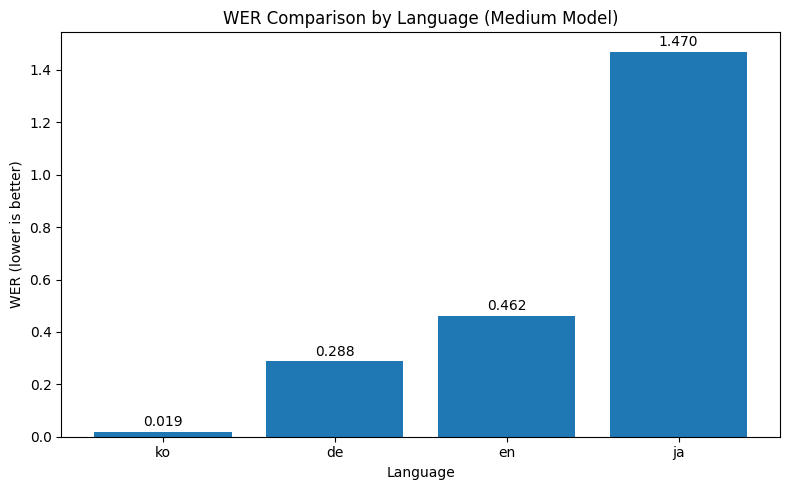

In [11]:
import matplotlib.pyplot as plt

sorted_items = sorted(lang_wer_results.items(), key=lambda x: x[1])
langs_sorted = [x[0] for x in sorted_items]
scores_sorted = [x[1] for x in sorted_items]

plt.figure(figsize=(8, 5))
bars = plt.bar(langs_sorted, scores_sorted)
plt.title("WER Comparison by Language (Medium Model)")
plt.xlabel("Language")
plt.ylabel("WER (lower is better)")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("wer_comparison_chart_medium_sorted.png")
plt.show()